In [1]:
!pip install citipy
!pip install gmaps

In [1]:
import gmaps

In [2]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests

# Import the API key.
from config import g_key

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
import random


In [5]:
# Import Linear regression functions 
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [6]:
# Import the NumPy module.
import numpy as np

In [7]:
np.random.uniform(-90.000, 90.000)

-20.844105499747442

In [8]:
# Import timeit.
import timeit

In [9]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

31.3 µs ± 2.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
def latitudes(size):
    latitudes =[]
    x=0
    while x<(size):
        random_lat = random.randint(-90, 90)+random.random()
        latitudes.append(random_lat)
        x+=1
    return latitudes

# call the function with 1500
%timeit latitudes(1500)
print("check")

4.07 ms ± 354 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
check


In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [13]:
# Add the latitudes and longitudues to a list
coordinates = list(lat_lngs)


In [14]:
# Create a list for holding the citiees
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

613

In [15]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Parse a response from an API

For each city in our lats_lngs list, we need to retrieve the following data and add it to a DataFrame:

City, country, and date
Latitude and longitude
Maximum temperature
Humidity
Cloudiness
Wind speed

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
print(city_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=591679f7c4f2de475d86824b8e92806d&q=Boston


In [19]:
# get JSON object
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 72.28,
  'feels_like': 67.69,
  'temp_min': 70,
  'temp_max': 75,
  'pressure': 1017,
  'humidity': 69},
 'visibility': 16093,
 'wind': {'speed': 14.99, 'deg': 220},
 'clouds': {'all': 20},
 'dt': 1592626322,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592644044,
  'sunset': 1592699065},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [20]:
# Get the JSON data
boston_data = city_weather.json()

In [21]:
boston_data["id"]

4930956

In [22]:
boston_data["dt"]

1592626322

In [23]:
boston_data["coord"]["lat"]

42.36

In [24]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 75 69 20 14.99


In [25]:
# get teh date from the JSON file
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 6, 20, 4, 12, 2)

In [26]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-20 04:12:02'

# Pseudocode for how we will get the weather data for each city for the website.
We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.

2. Loop through the cities list.

3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
     
4. Build the city_url or endpoint for each city.

5. Log the URL and the record and set numbers.

6. Make an API request for each city.

7. Parse the JSON weather data for the following:
    City, country, and date
    Latitude and longitude
    Maximum temperature
    Humidity
    Cloudiness
    Wind speed
    
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.


# Import Dependencies, and Initialize an Empty List and Counters

In [27]:
# Create an emplty list to hold the weather data

city_data = []

# Print the beginning of the logging
print("Beginning Data Retrival   ")
print("--------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrival   
--------------------------


In [28]:
# Loop Through the List of Cities and Build the City URL
for i,  city in enumerate(cities):
    
    # Group cities in the sets for 50 logging purposes
    if(i% 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | kembaran
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | hoquiam
Processing Record 8 of Set 1 | clacton-on-sea
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | sur
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | olafsvik
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | andenes
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | wanaka
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | ambalavao
Processing Record 21 of Set 1 | lorengau
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | upernavik
Processing Record 24 o

Processing Record 40 of Set 4 | quang ngai
Processing Record 41 of Set 4 | novoyegoryevskoye
City not found. Skipping...
Processing Record 42 of Set 4 | sungaipenuh
Processing Record 43 of Set 4 | arlit
Processing Record 44 of Set 4 | shu
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | alekseyevsk
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | husavik
Processing Record 49 of Set 4 | fort nelson
Processing Record 50 of Set 4 | mason city
Processing Record 1 of Set 5 | dalhousie
Processing Record 2 of Set 5 | barrow
Processing Record 3 of Set 5 | yeppoon
Processing Record 4 of Set 5 | lephepe
City not found. Skipping...
Processing Record 5 of Set 5 | nabire
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | tateyama
Processing Record 8 of Set 5 | ca mau
Processing Record 9 of Set 5 | schmolln
Processing Record 10 of Set 5 | thompson
Processing Record 11 of Set 5 | margate
Processing Record 12 of Set 5 | rawson
Processing

Processing Record 29 of Set 8 | diffa
Processing Record 30 of Set 8 | sanmenxia
Processing Record 31 of Set 8 | zeya
Processing Record 32 of Set 8 | bandarbeyla
Processing Record 33 of Set 8 | havre-saint-pierre
Processing Record 34 of Set 8 | zelenoborsk
Processing Record 35 of Set 8 | bilma
Processing Record 36 of Set 8 | tibati
Processing Record 37 of Set 8 | barbacoas
Processing Record 38 of Set 8 | laguna
Processing Record 39 of Set 8 | stornoway
Processing Record 40 of Set 8 | jutai
Processing Record 41 of Set 8 | pogranichnyy
Processing Record 42 of Set 8 | lander
Processing Record 43 of Set 8 | isangel
Processing Record 44 of Set 8 | nouadhibou
Processing Record 45 of Set 8 | letlhakane
Processing Record 46 of Set 8 | muisne
Processing Record 47 of Set 8 | hamilton
Processing Record 48 of Set 8 | sao felix do xingu
Processing Record 49 of Set 8 | gorontalo
Processing Record 50 of Set 8 | paujiles
Processing Record 1 of Set 9 | raga
Processing Record 2 of Set 9 | mende
Processin

Processing Record 18 of Set 12 | port moresby
Processing Record 19 of Set 12 | guiratinga
Processing Record 20 of Set 12 | padina
Processing Record 21 of Set 12 | tocache
Processing Record 22 of Set 12 | constitucion
Processing Record 23 of Set 12 | alzamay
Processing Record 24 of Set 12 | chapeco
Processing Record 25 of Set 12 | kapit
Processing Record 26 of Set 12 | codrington
Processing Record 27 of Set 12 | bajil
Processing Record 28 of Set 12 | camocim
Processing Record 29 of Set 12 | nguiu
City not found. Skipping...
Processing Record 30 of Set 12 | dubno
Processing Record 31 of Set 12 | lavrentiya
Processing Record 32 of Set 12 | mawlaik
Processing Record 33 of Set 12 | la ronge
Processing Record 34 of Set 12 | manta
Processing Record 35 of Set 12 | dzaoudzi
Processing Record 36 of Set 12 | kitui
Processing Record 37 of Set 12 | eureka
Processing Record 38 of Set 12 | salamanca
Processing Record 39 of Set 12 | rungata
City not found. Skipping...
Processing Record 40 of Set 12 | 

In [29]:
len(city_data)

562

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,33.80,83,54,10.29,CL,2020-06-20 04:00:00
1,Kembaran,-7.38,110.00,89.60,52,20,9.17,ID,2020-06-20 04:12:32
2,Atuona,-9.80,-139.03,80.29,74,88,14.61,PF,2020-06-20 04:02:47
3,Severo-Kurilsk,50.68,156.12,42.37,90,100,18.25,RU,2020-06-20 04:02:49
4,Port Elizabeth,-33.92,25.57,66.20,29,21,6.93,ZA,2020-06-20 04:01:41
5,Hoquiam,46.98,-123.89,64.00,82,75,9.17,US,2020-06-20 04:12:33
6,Clacton-On-Sea,51.79,1.16,55.99,85,98,10.25,GB,2020-06-20 04:12:33
7,East London,-33.02,27.91,66.97,31,1,10.89,ZA,2020-06-20 04:03:14
8,Sur,22.57,59.53,92.16,51,33,9.10,OM,2020-06-20 04:04:11
9,Ushuaia,-54.80,-68.30,37.40,86,75,5.82,AR,2020-06-20 04:02:43


In [31]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-06-20 04:00:00,-53.15,-70.92,33.80,83,54,10.29
1,Kembaran,ID,2020-06-20 04:12:32,-7.38,110.00,89.60,52,20,9.17
2,Atuona,PF,2020-06-20 04:02:47,-9.80,-139.03,80.29,74,88,14.61
3,Severo-Kurilsk,RU,2020-06-20 04:02:49,50.68,156.12,42.37,90,100,18.25
4,Port Elizabeth,ZA,2020-06-20 04:01:41,-33.92,25.57,66.20,29,21,6.93
5,Hoquiam,US,2020-06-20 04:12:33,46.98,-123.89,64.00,82,75,9.17
6,Clacton-On-Sea,GB,2020-06-20 04:12:33,51.79,1.16,55.99,85,98,10.25
7,East London,ZA,2020-06-20 04:03:14,-33.02,27.91,66.97,31,1,10.89
8,Sur,OM,2020-06-20 04:04:11,22.57,59.53,92.16,51,33,9.10
9,Ushuaia,AR,2020-06-20 04:02:43,-54.80,-68.30,37.40,86,75,5.82


In [32]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV 
city_data_df.to_csv(output_data_file, index_label='City_ID')

# Modify the .gitignore File.

In [33]:
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Punta Arenas,CL,2020-06-20 04:00:00,-53.15,-70.92,33.80,83,54,10.29
1,1,Kembaran,ID,2020-06-20 04:12:32,-7.38,110.00,89.60,52,20,9.17
2,2,Atuona,PF,2020-06-20 04:02:47,-9.80,-139.03,80.29,74,88,14.61
3,3,Severo-Kurilsk,RU,2020-06-20 04:02:49,50.68,156.12,42.37,90,100,18.25
4,4,Port Elizabeth,ZA,2020-06-20 04:01:41,-33.92,25.57,66.20,29,21,6.93
5,5,Hoquiam,US,2020-06-20 04:12:33,46.98,-123.89,64.00,82,75,9.17
6,6,Clacton-On-Sea,GB,2020-06-20 04:12:33,51.79,1.16,55.99,85,98,10.25
7,7,East London,ZA,2020-06-20 04:03:14,-33.02,27.91,66.97,31,1,10.89
8,8,Sur,OM,2020-06-20 04:04:11,22.57,59.53,92.16,51,33,9.10
9,9,Ushuaia,AR,2020-06-20 04:02:43,-54.80,-68.30,37.40,86,75,5.82


In [34]:
city_data_df.count()

City_ID       562
City          562
Country       558
Date          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
dtype: int64

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [36]:
import time

# Plot Latitude vs Temperature

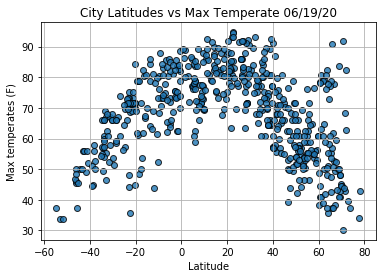

In [40]:
# Build scatter plot for Latitude vs Temperature
plt.scatter(lats,max_temps,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate graph prdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYUAAAEWCAYAAACJ0YulAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOydeXyUxfnAv7P3bjabZMlNEoIEkKsgIqACghYFT7QeFYsWK6A/j6ptpbWoeLViK1qLrYrVeiHihQcGtSgKKsghyhkIEI6EXITN5tjNXvP7491dNmFzkoQE3+/nk09232PmmXnfnWfmeWaeEVJKVFRUVFRUADQnWgAVFRUVla6DqhRUVFRUVMKoSkFFRUVFJYyqFFRUVFRUwqhKQUVFRUUljKoUVFRUVFTCqErhBCKEuFcI8cKJlqMh7S2XEGKuEOK19kpPRUWl41CVQgcjhJgqhFgvhKgWQhwSQuQKIcYASCn/IqW8KXhdthBCCiF0bczn10KI1W24b7wQ4mDksfaUqysTUbaNDY4nCiE8QoiCds7v3uB7UC2EcAsh/BHft7ZnXp2NEOJmIcT/jjONG4QQ+4P18bYQIq7B+euFEHlCiBohRL4QYlSD8w8JIe4XQsQIId4RQuwLPt/RDa6zCyFeF0KUCSFKhBD3RpHlXCHE50KIdCHEkuBvt1II8ZUQ4vTWyN3dUJVCByKEuBt4CvgLkAJkAf8CLjuRcqkcQ4wQYnDE96nA3vbOJKhsrVJKK3Az8G3ou5RyUHvn1150RodACHEa8DRwDZAGCOAfEecvBuYC1wFWYAKwv0EyFwIfAxL4EuU5HomS3TPBa7KAs4FZQohrG0krFlgNDAPswFvAMiGEsSVyd0uklOpfB/wBcUA1cFUT18wFXgt+3o/yolYH/84BKoAhEdcnAy4gKUpavwZWN5LPdGA7UAXsAWYFj8cE0wtE5JvejFxnRp4PXpMdvEYX/N4b5UdZBXwGLGhw/WjgG8AB/ACMb1COPcF79wLXRSlPelBue8Sx04ByQA/kBPOvDB57s5F6Cck9B/hbxPH1wJ+BgohjfwR2B+XaBlwece7fwNsR3+cBKwDRxLOP+ryAwcDnKI3ZdmBKxLnFKA3OZ0ANsDL4TvwrWJdbG7wvxcA9wI7gu/Q8YIw4fznwY/DeVcDABvf+PphmbfDY/cFnUgVsAS6KqHs34Au+I8XB42aUTtGBYHr/jMy/QbnnAy9GfB8UfMam4PeN0d6FiOtTgEMN6zz4/Ec3OFbVoJ4eAj5rcM22yPqIOC6CZR3UErm74586Uug4zgRMwHstvH5c8H+8VHqOX6I0Ar+KuOZa4H9SyrJWylIKXAzYUBTEk0KI4VLKGmAyUCSP9liLmpHr2xbktwjYACQCDwM3hE4IIXoCy4BHUHpevwfeEUIkCSFiUHpdk6WUscBZwKaGiQdl/Bb4RcThqSgNszeY56dAApCB0hg1xWvAL4UQWiHEAJTe4doG1+wGxqIo+weB14QQacFzvwN+FjThjQV+A9wgg61ESxFC2FAa/P+g1N31wItCiJyIy65BqbNEQAesQVGAPVB6to83SPZa4FygP0rj/YdgXqNRlMn04L2vAksbjAquASYGzwPkoTyTOBTFt1gIkSil/B64E1gZfEdSg9c/iVL/Q4L590NRrtEYhNJBAEBKuRXQAn2CvfJhQLoQYo8Q4oAQ4slQbz3IZGB5K+pcNPgcHikKIbIBs5RyW5T7RgF+jo4kG5W7hXJ0OVSl0HH0AMqllL7jSONlYKoQIvScpqH8eFuFlHKZlHK3VPgSpcEcexxyNYoQIgs4A7hPSlknpfwK+DDikl8BH0spP5ZSBqSUn6H0zC8Mng8Ag4UQZinloeCPLBqLUBo8hBAC+GXwGIAX6AWkSyndUsrmfC0HURq8n6MosFcaXiClfEtKWRSU+U1gFzAyeK42WK75KArmdinlwYZptIDLgS1SytellH4p5TqUuotUfm9JKX+QUrqA94FKKeWbUko/sASl4Y/kH0G5y4C/EqwzYBawQEq5IZjX84ARiLSXPxm81xUs55vBZxKQUr4KFDa4PkxQudwI/FZK6ZBSVgKPoTynaFhRRnaRVKEo6J4oDfcVKKPMEShmn3sirr0IRSm2hE+APwV9D/1RnrmlubSEEAnAf4E5wWfenNzdElUpdByHgcTjscdKKdeimAnOEUKcimIW+aC16QghJgsh1gghKoQQDpQGOLGtcjVDOnAkOAoJsS/icy/gKiGEI/QHjAHSgvdcg2JvPySEWBYsdzTeBs4UQqSjjGYkigkElMZCAN8JIbYKIW5sgdyvoJh0rkVp2OsRdHJuipB5MBF1KKX8DsXsJVAa57bQCxjXoG5+gWKrDlES8dkV5bu1QZoHIj7vQ3k+obzubZBXEkoDHO1ehBC/EUL8GHF9Do2/R+koprytEdcvRTF3RaMaZSQbSSxKA+sKfn9KSlkqpSxBMaNdGJRLB4xH6ey0hFtQ2r49KD6C11E6BiFC/oQwQghr8NhnUsonWyh3t+Skm1HShfgWxfY4BaUBa47Ghr0vo/RCi1HMI+7WCBEcYr+DYop4X0rpFUIs5ejwubnhdrTzNdTvWaVGfD4EJAghYiIUQ1ZEOgeAV6WUM6JmJuUnwCdCCDOKiWkhUUY1UkqHEOJT4GpgAPBGyHQgpSwGZgAIZabX/4QQX0kp85so5zsovo8NUsp9Qoi+oRNCiF5BOc5DcQ77hRCbiDBBCCFuRelpF6Eopb82kVdjHAA+lVJe0oZ7GyMz4nMWinyhvJZJKZ9o4t7wsxdC9EMxw50LfCelDAghdtD4e3QIxcfQR0p5uAVybgWGRuQ3EMVMs1tK6RZClEfJI8TZwNbgaKRZgqOmayLymg98F/xsQhmNXBlx3owyYtsB3NFSuVsiS1dEHSl0EMEX9H7gGSHEFCGERQihD/baG9p9AcpQTCenNDj+KopZ4VdEMWs0QAghTJF/gAGlsSoDfEKIycD5EfeUAD2amEYXTa5NKD3arOB9f4oo9z4Uc9CDQghDsFGObOReAy4RQlwQtOGbhDItNkMIkSKEuDToW6hD6YX5myjvIhRl9wuOmo4QQlwlhMgIfj2C0pg0lQ5BBXYucFOU0zHBNMqC6U+nvg26H4oC+xWKie8eIcSwpvJrhKXAaUKIa4LvikEIMTqYflu5QwiRJoRIRLHnvxk8/jxwuxBihFCwBuve0kg6VpT3oAzQCCFuRhkphCgBMoUQeoCgb+dF4B9CmeIrhBCZQoiJjaT/GvCLYHmtKH6bNyM6QS8BvxVC9AiW5Xbgo+C5Y8w9Qghj8P0HMER8RgiRI4RIEELohBCXopiP/hI8fS6wNmQyC3aqlqL45W6K4rNoTu7uR2d5tH+qfyhT6Naj9K6LUZysZwXPzaX+rJyHUH50DiJmTAD/AwpofjaLjPKnA25F+dE6UJTMYuCRiHtfRDF3OWgw+6gxuVCm9TmAfJReeeTso1NQTDnVRJ99NArFOVoRTHcZSi82jaOzhhwos2uOmQESkY4ZZZi+tcHxx1Hs3dUoPbaZjdyfHSl3g3M/p/7so0eD8paj+A6+RFEgOpRe5h8jrr0F2EwjM20inle02UeDgOXBfMqDzz4002Uxij07dO1tKM7V0PfBQHXE98jZR0eAF4iYFQNcijIhoBJlBLEYxcEaundMA9n+HkynDMXRvAb4VfCcCcVWfwQ4GPF8Hkd5d50ovepbmqmTgyi/lXeAuIhzRpTRWiXKKOQJwBA8twUY3CCtYo79LaQGz00Lnq8Nlv/ciPsWALdFfL8geG8tR2fgVQNntETu7vgngoVS6cIIIV5EmSE050TLotJ9EEIUA1fK5h3t3RahTGxYJaXs1U7p7QYmSin3tEd63RHVp9DFEcr0uCs4dlaJioqKYtb6fXskFDSdPftTVgig+hS6NEKIh1GGxn+TUrb7ClsVle6OlHKblPKtdkqrVkr5t/ZIqzujmo9UVFRUVMKoIwUVFRUVlTDd2qeQmJgos7OzAaipqSEmJubECtQGVLk7l+4od3eUGVS5O5vWyL1hw4ZyKWVS1JMnevrT8fydfvrpMsQXX3whuyOq3J1Ld5S7O8ospSp3Z9MauYH1spF2VTUfqaioqKiEUZWCioqKikoYVSmoqKioqIRRlYKKioqKShhVKaioqKiohFGVgopKF8fpdDLxoinkDBrGxIumkJu7/ESLpHIS063XKaionOzk5i7nQFEx7oEX039iDs7CfO6aOw+AyZMnnWDpVE5G1JGCikoXZv6CZ9FZ7cRnnYpGqyM+61SSxl3H/AXPnmjRVE5SVKWgotKF2VtQgNZgqnfM1jOHvQUFJ0YglZMeVSmoqHRhemdn4/fU38TLWZhP72B4FxWV9qbDlIIQ4kUhRKkQYkvEMbsQ4jMhxK7g/4TgcSGEeFoIkR/cGHx4R8mlotKduPu2m/FVV+DYv4OA34dj/w7Kvnqdu2+7uU3p5eYuV53WKk3SkSOF/wINPWF/BFZIKfsCK4LfASYDfYN/M4F/d6BcKirdhsmTJ5GZnopp20fkLbwT07aPeHLu7DY5mXNzl3PX3HmK03rGU7gHXsxdc+epikGlHh02+0hK+VVw17BILgPGBz+/jLIH7+zg8VeCgZrWCCHihRBpUspDHSWfikp3wWaz8dmypcedzvwFz5I07jris04FUP4HndbqTCaVEJ3tU0gJNfTB/8nB4z2BAxHXHQweU1FRaSWNmYj2FhRg65lT71rVaa3SkA7deS04UvhISjk4+N0hpYyPOH9ESpkghFgG/FUGNxgXQqwA7pFSboiS5kwUExMpKSmnL168GIDq6mqsVmuHlaWjUOXuXLqj3K2R2el0cqCoGJ3VjtZgwu9x46uuIDM9lZLSMgKmuHqzmfweNxp3JX1z+pxQubsSPwW5J0yYsEFKOSLauc5evFYSMgsJIdKA0uDxg0BmxHUZQFG0BKSUzwPPA4wYMUKOHz8egJUrVxL63J1Q5e5cTpTcubnLmb/gWfYWFNA7O5u7b7u5xSab1sg88aIpuAdeTHxWaviYY78D04cvcvdtN3PX3HkkjbsOW09lIVzZV6/z5NzZHVIn6jvSubSX3J2tFD4AbgAeC/5/P+L4bUKIxcAooFL1J6icLIQcvEnjruvwVcl7CwroP/FYE1HexwXhvOYveJa8jxXl1FantcrJS4cpBSHEGyhO5UQhxEHgARRlsEQI8RtgP3BV8PKPgQuBfKAWmN5RcqmodDad6eDtnZ2NszA/nBfUX9cwefIkVQmoNElHzj66tpFT50W5VgK3dpQsKionkqZ67+1NyEREFBORikpLUAPiqah0MKHeu6e6kr3ffIirohi9xUavOEu759VSE9Hx+DhUTm5UpaCi0sHcfdvNzLhzNk6/Hvu4adh69KR27w8czvuU3Nzl7d4YN2ci6kwfh0r3Q419pKLSwUyePInkBBsJp18EBjPaumpyho2m16QZJyTaaaSPQ428qtIQdaSgotIJOKuqGHzmBDTaoz+5gDWmQ/wKzdGZPg6V7oc6UlBR6QRCfoVIGot22nBFstPpPGGyqPz0UJWCikoncPdtN1P21evNRjuNFrTuQFFxuwata6ksKj9NVPORSremu8yiaemsoGhrGnTW4nZd0xApy8Ylm/EGwKDXhX0KXbH+VDoPVSmodFu62yyaliwc21tQQNrIZHbuyqfO48FoMMCZCe0etC4kR8OwF125/lQ6B9V8pNJtOVln0eR9/y0ujRkRm4zPEEudqwZbbGy753Oy1p/K8aEqBZVuy8kWCjo3dzmFRYeo+mE5viOHkEBtyV78tZXIgL/d8zvZ6k+lfVCVgkq35WSbRTN/wbNoTFZ6jLqcqu/eofj12VStew+tKZaqmtp2z+9kqz+V9kFVCirdlpNtFs3eggJikjLQxcSTceWf6f2bf5Bx5RwQokMa6pOt/lTaB1UpqHRpmtpofvLkSTw5d3a77F/ckTRVhkh6Z2eT1O80HF+/gatoJzLgp2b/FgK1jg5pqLtL/al0LursI5UuS0tmF3X1UNCtmSEVinDac/Aoyta9Q1nZQTTSR8rkxzqsjF29/lQ6H3WkoNJlORlmx7SmDKGee7qrAJu/krOGD2HJS8+RlpbWafJGjmpOG3kWw0ePbXaEo3JyoY4UVLosJ0OMntaWIVrPfeXKlR0kXX0iRzUJGRXkrViCddhk+gw5A3d1qbqG4SeCOlJQ6bKcDLNjWluGlvof2puHHn6Ey6feQP62H1n334fZ8fGL2M+5npg+wyk9XNEtR2kqbUNVCipdlpNhdkxryhAt7tFdc+e1e0C8hjz08CPMe+5V4if9loxbXiTh/P/D5SgHSzxavYk6jwc4dg3DiVJgKh2Laj5S6bKcDBvNt6YMDeMeibg0XNnj2L23gIkXTemwuE5PP/8S9nNvRpfSF4QGU9Zg9ImZ1Ozfiv7U0UqoDeqPcLpbiBGVlqMqBZUuzckwO6alZYj0P1RWVnKgqBh91hAQJeFRQyi99qTK6aRHxgAkAo/XiwBsIy7jyJcvo9cb6DPkjPAIJ7TXc7TAfQTNS939ef3UOSHmIyHEb4UQW4QQW4UQdwaP2YUQnwkhdgX/J5wI2VRUThSR/oeS0jJ0sXZ8FUVodPp2s+lHM/nE2mzUHtyOVqvFoNdDwI/QGaDWQerBlRxacv8xaxj2FhTgdlaw9oU5rHz8Jta+MAe3s6LJEBmqual70OkjBSHEYGAGMBLwAMuFEMuCx1ZIKR8TQvwR+CMwu7PlU+m6tDVMduR9s++6HZfL3abebHuH6W6YXmqPOJa++jABoYMYO9Y+p1O37weM59wJla2fedUw/bGjR7DooxXh2UUbVr7N5VNvIN5q5vD/FsLPZ2DJGICvZBdVq15mzuzfcf99c6KmHRtjIW/FEuznXI89tQ/u4t3krXiFPnZLo7Ko5qbuwYkwHw0A1kgpawGEEF8ClwOXAeOD17wMrERVCipB2tqoNLwvYCpvU2PU0vyjNcSr1qw/RpE0TK9g9VK++TyXzMm3EIhJ4siBPCrXLaXX8PHoTDFQ2bqZV9HkfeKF+WSccT6e6kp2ffke8WN+hd2ejnf/Zixfv4rz039S6nIRa7Mxe9b0RhUCgNBosQ6bjD4xE4QGfWIm1mGTEQdXRr1eNTd1H4SUsnMzFGIA8D5wJuACVgDrgWlSyviI645IKY8xIQkhZgIzAVJSUk5fvHgxANXV1Vit1o4vQDujyt0yduXvJmCKQ2swhY/5PW407kr65vRp8X3xej+Ha7zN3teW/J1OJweKitFZ7WgNJrzuWtyOMgxWG0ZrAn6PG191BZnpqZSUltVLr6a8CI0lDo1Wh9FoxO/3U+eqIeBykpGexuEab/hem83WJnlrqyqRddWAQBMTj0avnAv4PBg0tKpOftyyFY0thUCw/dAIgV6vx1tRyOBBA4H678iWrdvQxvbAU11JwO9Fo9VjsMbhrzocvr6r8FP4TU6YMGGDlHJEtHOdrhQAhBC/AW4FqoFtKMphekuUQiQjRoyQ69evB5QFPuPHj+8wmTsKVe6WkTNoGP1nPFV/43u/j7yFd5K/dVOL77ssxcF7RdZm72tL/hMvmoJ74MXh3vDOXfnUOsqo+2EZo256BADH/h2Ytn2kOJUj0lv5+E2kT/s7dRVFDAk2ko6KCr7/5ywee/A+3v/401aZq6LJm5eXR+E7f0Gj09Pz+icQGi0+jwuNq5KcU7JbXCe5ucu5evos4s+/jZiswfi9bnxVFcTLKhL3r+SzZUuVMkW8I6eNPIvdFR7s51yPKWhuqvjyFfrYDXz/3TctKlNn8VP4TQohGlUKJ8TRLKX8j5RyuJRyHFAB7AJKhBBpAMH/pSdCNpXOpyUOyLYuZGuvBXAtSafh/gR1Hg+WjAG4KorDx0Jz/RumZ7anUntwe3j6JwDVpZw5ahSDBw3ks2VLW2VmiSZvjL8KjfSht9hwH8rH53Hhq6ogJTkpXJaHHn6ExMw+GOOSSMzsw0MPP3JM2vMXPEvWmMupXPM2zn1b8Xj9uByl7Prw342uIWnM3FRVU8vw0WOxJqZhTUzntJFnqQ7oE8yJmn2UHPyfBVwBvAF8ANwQvOQGFBOTyklOYwu2GjYMbV3I1vA+v8fd7H3RlFRz+efmLsfhrGLjqk/Ztn0H23bswOv1UrnnB/yGWHbuyqeysjLc+DZML6nvMCo+fwGL10HA7+PgtvX8uGQ+W7ZsZlf+7lY3lNHkdW18nz/cOoNecTpKly/AU7CJjJQkZOUhyr56ndQeccx77lXME24m+9aXMI65kUefeYkeqZn1lPXeggLsQ87F3O8snOveo2Txn6ne8CEeR+P9OGdVFX2GnIHGVYm7/AAaVyWpOYM4UFhEccZ4Uqf/k8RLZ7O7wsOMO2eTm7uc3NzlnDbyLKyJ6VgT0xg+eqyqMDqBE7VO4R0hRA/AC9wqpTwihHgMWBI0Le0HrjpBsql0Ii11QLZ1IVvD+zR33d7kfY05lJ+cO5sn586Omn/onpRRl7B/Yy7+oZMxZg7GV12M46uXMZ8yAg868jetQZf3Kc89/mDU8lwzaxqr1qxk0yf/xlnrJmvM5WSPmdIm53hT9XX/fXOOOsSXvB8+N23mrdjPvRlrryF4XdUIWzIJ586ket079dZJ9M7OZue2DdgGjcN+2gUAuIp24lz9WqOO497Z2birS+nX99TwsR9Xf4YuPo2YPsPRGczoe/bHfs71OFe/xr0PPERZZQ1Ov57ES2ej69GT4r0/MOueB3iuFfWg0npOiE+hvVB9Cq2nvaZVtpfcbfUVtJXm5G7oF4CjfoCQrbype1Y9+X94hQFfTSVaawIxGQOoPbAV7+EDWFN60StO16wNfeJFUygyZ1O2axOuimIe+dPd/OPjjTh/+Ix4W2y7TIeNhjEuiexbX0Kj1VFdXojWEg9aPYdevovz57wcroe7b7uZX/zmdpIn3YYpLQd38W4cX79B33Mu58jqReHnFlnXubnLmXXPA4iBkyAuFSqLKf3qdWKHTcZ++oUIIQCQAT8HX/4duJ0YemRgG/MrzOn9APB5XHgKNtGv+odGn0V78FNoS5ryKagrmn9CdMW54iHbd2QjfCKD3rUlMmvkPX6vh8zr/4qrrg5fZSm21GxkwE/hK7/jzFseJ2/hnc3KsGXLZlzmYuLPnoo9tQ8aSw3F29YTqHEx6nf/6bDnFlrEZu01BOnzIvQm6oryMMQlAkfrYfLkSfTPSGLf169zuNaJ2Z5K/wlXYrDGNfncAh43tZty8dQ4McTYwF2FISYOv9eNzmAGwF28G0OMDY+7Ek+NE1Pq0dlQWr0J4lLZu0W1LHckakC8nxDtvT9Be6xQ7WpB79rimI68x2xPxV28G/w+NBotoDR0Zntqi5WdNwCxI3+BOb0fQqMFnQHb6KtAq+/QfSXumDmdis9foHrfZtBocO3fguPrRfQafRFQvx7+8uD9JMfHMOyXv+eM6XMxWOOafG7zFzxL70tv5+zb5jNh9gucfdt8TjnvWhxr3qJm90a87mpchXlUfPkKFurol5ODIcam1GUQv9cNlcXdKkpud0RVCj8hGs6OgWMjX7YUp9PZIgdxc7T3lpDHq6jaoqQi7+k1+kIqvnyFuv0/IAJeqvdtxvH1IpL6DmuxsvPWufHpzFQ7HdTU1hCoq8G59m187mrWvjCH0m1r6z23psrcmvq4/745zJ41DdcXz1Ky6E8c/ng+xpRT8Nh6svWT19j06sNs3b6d4aPHcu8DD1FZvJ/ti//KpqdnNfvcor172WOmEKv1kXpwJcUv3U75B/PoYzew8Kl5PPrAn7FQR8WXr+AqzMPrrqZm90bktuXdKkpud0Q1H/2EaE9TTUlpWbutUG2voHftYR5ri0M78p5DBQX0sVsQhV9R8n0pdV4fZg2kuwq4uwXK7qGHH6HW48dYdRiN3oR73w/4ew8kduTl6GN7oPPXkffFG1SXHaB3dnaTZQZaXR/33zeHM0aM4K6589BmDqVs5/fsX3Qf0mCm9+RbSMoeyO7N66jelEv/SbMw2exhZddU2Rp79wYPHtKof2AhcO8DD7Hrg3mApF9ODo9GOOlVOgZVKfyECO0BzLjrsPVUGonIyJetoa6uDlvP+itRT/SuaO0VSqGlSqq9YyGBEsY6ZtAEqr9fRtzZU3EXfI8u5my0MSAMZkzxWcSOvIL9ny7g7y8912SZgRbVR8NylJeVknTOjcRnncop51zJ2hfmYBx6ETI2idLDFcT0GY4hLol9a95VFuW1oI7b8u6dDBFyuyOqUvgJ0Z77ExiNRpwFXcdBDJ27fWdHOe2rnE56nDoGY88BONe+Q13hDtDoIOAn4KrC7XNjttkJWExMnjyJ23//R9JGJrNzVz51Hg9Gg4HkHslh01Jz9RGtHHmvz2OQsyJ8jauimISMAdRVFAFgspnQpvahpGg3a1+YQ+3hYnA7yc1dfkzZIxWOLTaW6i9fJL+kBG8ADHpdWHmpjX/XQVUKPzHaq/eVkpxE2cIn22XU0V505kymjgrwFmuz4T9ShLn3cCx9Tqf0vccg4EPo9FhNRvr1zVGmhg4YAIAtNpbdm9cF5/r7qa06wo6Nq/EcrqBPdq9m6yNaOZLGTmX3yrdJHXwWcHS1tSU+CVAcvs5NnyINFiwjrsAWDKrXUCk6nU7uefTJegpn7wf/RG9LJGfSjPB7M+ueB+jxwENU1dR22HRblZajOppV2oTNZmtXB3F70JJVx7vyd9dzurbVMR1ynJZuWxveUyDvk1fZsmVzvesaS7+x43fMnI5zzRIc377FoVf+gPvAFnzOMuqKdxNjMbHny7fZ8N+5rP7mG6yJ6eTt2IHjmzdxFe7kyNavKP/0XxxZ+V/qNEb2Hyxk3/KFTTrNozmAswaeTm3pvqirrZN72KnZvZEj6z8gccKN6BMz8ddU0mvIyGNmREX6nUKzpmoxIgZOCh8TcWn4+p/PvkrfcU1YUGk/1JGCSpvpajbfaOaxqRefx/wFz3LjzbdSi5HHHp5L/xlP4SzMZ8ads9EYTPSaNCOqCShk+tiyZXPY3DFowADuvu1memdnU7B6KYVb1hJ/9rXYU/tQc2AbzurbgigAACAASURBVC9fCptRGjMxrVu/PryvQcN8779vDrt27WLxB5+hjUskacof0Vrt1PywkM0rnkcfl0TsmGkYs36G5/ABHKteh7pqit97DI3VTvyYazFlDMJ7+CA1a97E5qlSFHcj5sJooyuqSxnYv1+9+0Krrfd+9V9SY2M5EvCitdjQuCrJTE8lLi6OgDWmnmkqmt/JU+NUFq8FKSktw9J7KFVr3worDjWk9olFVQoqJxWRiiqyUfYfOIJt2MX40FBVXRPutcYGe61wdE/kq6bdSN9Tsjns8hPb/0xc5mJiR/4CrSWOclHLXXPnMfXi8/jbMwuJP/82TGl9lQVYVjunXDgz3KA1ZmJ6+vm/MuCXf2rU9FR8uJLYlKOreXVmDxm/fJCiN+cSM3QSxl7D0BotmDMGwdhfUbn6daitJHHS7RjT+0IggDatL8Zx0yj9YB578hpf/du4A/jPAGF/QOjaUN1OvGgK7jg98VlHRxkNTVPR/E6GGBtUFgNDACVoINWFmO1HFcWJnrDwU0dVCirdjpbO+olslF1HSrBnDkRovZSUlhEXF1ev11pvT2STjX2VPgyDfs6+H/5H7Kir0KX0RSP9OF0afNnjePwf/8IfCOB3FOG2xGE0GMhMT8V14DDfrv2OnEHDKC4p4bSRN9aTydYzhyqnM2x62vvNh7gqijEnpKCtPAgoJh1PjfuY1bw+VxXahDQ0RgtoFMuvMa0vfpcTGQigt6dDIIAM+DHo9QR69ASaDmPT2OQDaHo6a0tmE0XzO1moQ25bjiMrE1vPHOSRQo5sWMaAideG7zvRExZ+6qg+BZVO53gWmDUXVTU3d3k4FPMXX61i89v/oHTb2vBKYyE0Su+Uo73WyspK9u7bj99gpba4AGNcEm5HGVp7Jt6qIxjT+4NGi08KXC43gZT++HRmepx7E9XbVpEiqujXN4e6wh3krVhCj/Nm0H/GUxh6ZLJ78zoqKyvD8jsL84m12ShYvZS8L97GMuIKel7/BMZhF1OLkdzc5fTOzo66mldnjsVbUQQ+T/i4t6wAnSUOIQS1ezYS8LjQ63RIv4favT/QL6e+vyAakydP4rNlS8nfuikcoru51e8tWXQYze+08Kl53HT1JWxf/Ff+98BVOFa+iNFXhcEa1yVWtHck3WWP6haPFIQQMYBbSunvQHlUugBtmX/f0nuOdypnc/PyZ93zAL7+55M69rfUFhdwZPXrbPnoBTKGjuXgp//Gc9odFC/9O84veqCpKcf9/Qfk+wNgSyFQuocjK18i4Kom4Kml4n/P4Xc5KXn7QWKHX4Kx56kInQGvoxitLQVNjywsPzufXZ+/SWL/09n1+ZtYh02m15CRaLQ6+p57Dds/e4N9Wg2Dz5wQ7k3fMXN6PdOTp9qBNMRgHn4Z02beyh0zp7M9/y0qvnwF+7hpyP5Z1OzeiAU3NevfRaPVYc4ehreiCMeqV6Cuhqz0FHx7vsDlOEB54U68laUEXFUc1mqxJqYpC78e+HOL7fQtmd7bnE/J6XTyz+derPdOACz6aAUDfvknsCazf9sGiv/3Aj++8iDWGAsDBww44RMWOoKuGHesMRodKQghNEKIqUKIZUKIUmAHcEgIsVUI8TchRN/OE1Ols2jp/gZtved44y81Fapj/oJnCZw6EX3mEHxSiyG1D3FnT0XqzZRs/VaJHWS2kXTx3cQOm4wlIYkYUYd78yeUvf0gh5cvwDroXOznzUCXkE7M0MmkXDcP69BJVK1/n5odq/BVleP89k2swy4AcxzGxEw8hw+Qt/BOPIcP0GfIGcTFxQGQPHAU/c+7msMrFtbrTd9/3xxiLSbMNju1JQV4aioxxqcQN+BsXD6l0Zz5q6voYzdQ/sE8vIcPkHpwJa/8+x/88ZZfU/3Vfyl68TbKP3gMracGe6yZZ56az01XX0JdwffEDvk5scMvQp/Yi7jzZpI09W8UZ4xn1j0PtLh3ejybE4X2QdhdsJ+d1qGkXf1Q+J2494GHSBp3HSIujYMlZRiyh5F22T1o49OITUo/pjPRXXrXzdHeccc6kqbMR18AfYA/AalSykwpZTIwFlgDPCaE+FUnyKjSibTl5W3NPccbf6mpxmrr9u0ErMkIgxmhMyA0OgzJvfHXVFJdXkTiqMsxWawMGzqUn42ZSK9JMyg97ODMWx7HmpxJwvhfE/uziVRvWUHC+OmYMgci62rR23sS87OJOL9ZjHPN28SediGWPiPQGC3UluzlzFGjyN+6iTNHjYLq+hvNmGx2zhw1sp5pBmDQgAGkmCVmsxmzPQWDOYa6kj3EJGeSNO46Vq1Zz/fffUN1eRGnDf0ZG9esCu+F8M5rLzJ+zFlkpacyeugAFj41j8mTJ7FqzXp+dvXdxGX2p27fDySMvwFL7+H4vHXE9BmOGDipxY1QWwMVhjoI+yp96OKSMWQP42BJGSIujaRx17Frj/L8S0rL0MXa0RnMmNJy8NY6j3ln2tJB6aq0Z9yxjqYppfBzKeXDUsofpZSB0EEpZYWU8h0p5S+ANzteRJXOpC0vb2vuOd7tMZtqrDxeH/7KEsXmLgCNBl/5fnRmKyajgcFnTkCr1daTESTOwnx8dbXEZv8Mf60D75EiDEnZaIwxIATGpF4YkrIReiNCo0NjikUG/NQd3IZzzdvhhrI1DWnoWmfhTjRaPa6inTi+foPeZ13SbH1H8wFEPoc6jwdPRSHCYMZbWYbf40b6/UrY6RY2Qm0NVBjqIHhrnWj0RnQGM7pYOyWlZfXqu87jUUJhczSKbMNyd6fedXO017awnUFTPoVLgHcBhBAJUsojDS+QUno7SjCVE0NbVgW35p7jjb/UVKgOvQaqN32MBMy9hio299Wv4a8qZ1BfJS/Sj059dBbm0y8nh7KvXkdvseF3FGNKykJvS8Rfkg8xdgj4qSsrwFNaABLMvYcpEUsdxUhfHRmJcWGZWhNGJHRs2sxb2ffVq4AGQYC933wYDnbXHA39OLExFpyF+XgP5SH9Pvw1Dow9ByA9LtzOCqgopF8rGqG2rEMJ+SLM9lQC3jrAiFZvovZICVu+/QK/P8CPS+YTO/IKfLF2fBVFOL5+g/4Troy653VnhS1pLxrzrbVn3LGOpimlMIegUgBWAMM7XhyVE83Y0SN44oX5WEZMITatDzH+Klwb32/y5W34whesXsr+1e8RazEx8aIp4Z5y6McSG2OhZtXLHKqqarThzM1drkTI3FNAOEJm0FEa2fiGfAkAgwcPocicTdGmXByfvwBCoDfHYtRIDh0qonbJfLxD5hLwW4+Zj3/vAw+Rt3wBSWOn0iOzHyVfvEj8Ob/GkNYXz6FdONe9i7+mEueGj9BqNMQkpmOhjmeemldP7uYa0oaNxuQJY3j38zXYz70JS8YAag9up+DzF7hm1rTwtZddeD6P/u0pxo4ewdJln7AzPx+fx4PO1oO+l/wf/ScOw1mYz+HlCyn74J9U+3XEDp2Ec+072EZfhTE1B19VOdVr3uLuhf9o7SvRKkIdhN5nXYK/uoKqvXuRJht1Jbtxrn0Hv8uFnwpcuc8gdHpiUrLpO/7K8H4Mke9ZV9uAqTla4kxuj7hjHU1TSkE08lnlJCU3dzmLPlpBxhnnU7bzawq/eRON9PGHW2e0OHT0mlc3UIOB+NHXYs3oS7m/iln3PEDA46b3pbeHfyxlX73OP//+WPi+23//R2yxilmmuKQEp8uHiO0RdX/edevX88QLixTFNeESyv1V4QVliz5aweDL/w9bzxyK8jax88N/k3nO1WSPmULB6qW4HSVsevq+Y2a5RK5gXrXxG4wDzqFq/fv4qsrRWu1Y+p6Jp2gH9uGTqPj6TXrF6fjLgw+16kcdrdH4YMl8UoZNQB+fRF1FEZb4JBIvuYWly94Jr3o2JaVSZM7msX+/gm30laSO/S2H3v0rlp9dQEXATGxwMR6TZlCz6mUc+fnYxt+I1mjG+e0SAjVHsNhTidX6OrwRCnUQksZdh86opzT3YWRAghBYh07CnHMGAWcZR756lQRtHUNy0tm7elHURrI79a6h+XhYXS0CQGM0pRTMQojTUPwOpuDnsHKQUm5sa6ZCiLuAm1BW1mwGpgNpwGLADmwEpkkpPY0motLuRL7Up5xzJaDsT7xqzUfN3ht62a+ePouk828mJmswfq8bRxUETp1I7Y+fHvNj+fODj1IrdSSNu460kcnhOP0avQ2pFdjOmoohNQetVktMn+F4tBr+/OCj7CrYT/z5t9XLI374Zaxas5In584O98YcziqyR18SLssp51yJJaGYgQMGRI3hH/rR6mLt2Aediy4uGYQGAn58znJqt33JaeMm4cjOxrTto3orpxsb1YTIzV3OtJm34vJBxaev0fusS0geOArLiClU7/qaURccnbMR8Pv48q15nDb94WCdOSjbtQnb+OnoYxPRm6z4XdWYs4cRqK0ML8az9czhUFUVZ44ahTvBSPzQa+DCa8LP0bSt+ed4vER2ELwZ55L285soW6+EATem9yfgdeMXGmyjr6T8s+cAjukcNJzS3B1619A9zV3RaEopFAPzo3wGpTE/ty0ZCiF6AncAA6WULiHEEuCXwIXAk1LKxUKIZ4HfAP9uSx4qbeN4X+r5C54lIHTEZA5ECKHsuxtrp85Vg6fGecwKXmfBNs6YNY/4rFPZuSs/HKe/6J1H0VjiMKbm4PV60Wq14f15d+bnI/WWY/Io2b6F7atW8e3a7wg1zDXVVWSPmVJPRq3B1AJnqyBQ60STmEXA60GjNxGorSQ038LWM4eNSzYz8aIpbN2+HUdlFRitJEcZ1UTGQNKPvIYe/c+irmQPeV+8AUBsWh8Kv6k/X0NxSIp6zntXRTEJqTn4qw4DoI9LxltRhDCYqPPI8H2hBvVE9rBDynXBM/9i8JkT+GzlqxhSlNXZQqtH+jyYeg1DY4nDPfDiqCPJSLNLV1UCDelu5q7GaHT2kZRyvJRyQiN/bVIIEehQRiI6wAIcQlEybwfPvwxMaeRelQ7ieGdI7C0oICYpo95KXK3ehLfiIAJ5zApeaY5THKAQno1iSu0DQqA12/CUFiCl0uCF9ucFcUwezh3fUr7mfUjIwHrBnSROe5LijPFU+bUUrK4/IvB73M2WR/q9ONe+Td2hXSD9uA/txPndOxBQlELB6qXUYsQ98GKsF95D7DnTwWTF76pCb7IeM/0zNAKz9exHwO/FnN6P+LOvZe83HxLjryLgrubrBXfzxbyb+HrB3ez94J/0PaX+szDbU/EU54f3fY4fdgGOVa/gO3wAg06LY/8O9i1fSHlZKbf//o+YZR01q14+oRFsjUYjzsJ8DLZE6kryQUoCHpeyALDiAIa4ROKzTkUMnEQtxm4/y6ir7TfeVkToR3fMCSHGSClXN3qjEDYgS0q5pdWZCvFb4FHABXwK/BZYI6XMCZ7PBHKllIOj3DsTmAmQkpJy+uLFiwGorq7GarW2VpQTTleS2+l0cqCoGJ3VjtZgwu9x46uuIDM9FZvNVu/aaHLvyt+NR2PA66pBa7Wj0RsJeNz4nGUgA+jiUtAYzEgZQPp9SJ+HgMuJNSmD2ioHfncN0ucF6QeNFoQWndWORm9QGhO3E50GAoaYcB5otHgdJQDoYnsg9CaQEpBIjwt/9WEs9rRweexGMBoNx5Qnki1bt+HTmpB+D9LvQ2h0Sro+N+a4RGorDmGKT0FvsuByuxXFJSX+miMYEtKQAT8Bnxef4xCxVisutxtLci/8fj8erxeh1SEQeA4fQKvVIKVAY4kDrR78XnA7SUyIo6KyCp3VTo8YPSVHnHiqK9HGJKAxWpB+L77KUpABtFotep0Or9+PMS652WfXWVRWVnLwUAlSZ8LrrkEbkwAaLdLvJ1B7BL0lDqE34vf78TkOYbGnojPFAOB11+A+UoJep8NoNJKSnNRp5Tie36TT6aSktIy6urouLfeECRM2SClHRDvXlPnoF0KIx4HlwAagDDABOcAEoBfwu9YIDcr0VuAyoDfgAN4CJke5NKq2klI+DzwPMGLECDl+/HgAVq5cSehzd6Kryd1wdszY0SNY+uHHx0yxiya3y+Wut7dvTdnBsKP62ZdexXrhPXh8lRgNBlKSk5B+A+ueuov0sy+nePs6Ys+4Aq0lHmoqcax6DX/VYbR6PRqNCNvpgXp5VOzZDBotWkscqdfPR2i0yEBAaVyrKvH9bwEDBwwIy3/7rBu59NJLmy7/0ws4eMSFbfSV6O098R4uoGb9UuINksGDh7B1+3ZOu+M5NFodO3flU1vnRWOJo+TN+WRMfRS3swJf9WECW5bT/4JpbHr1cXpOvgUZm4rL5UIC3vL9+NYvIatnOjFjbyA+Kyssg2P/DkzL3mTs6BE8/eg87v3dHfzliaeZPGEMW3fuYWe+Yl7qe0o2f3nwfiZPnqRELR14MfFZqRHpODB9+GKjeyA39dzbutFNKJ2t27cz+67befDhv6AxmvHU1uAJSHxeD3p7BtaB4zBmDsEYl4SrZD+OrxchvC4MRjN1VUfw+TzEDx7PGZfPwFmQT9nCJztktBOt3Fartc2/ydzc5Sx578N66XXW77u92pJGlYKU8q5gA34lcBWKI9gFbAeea2oU0Qw/B/ZKKcsAhBDvAmcB8UIInZTSB2QARW1MX6WFNNYQRAs93dDWazabjkkv0jFY569k6PAh4TRXrVmP2yyJzzoaX9+xfwcZ6WnsX/0ucefciCE+BXQGAhoNllNOx5v/NUk97FEbqVAeFYApvR9+jxtPyR6MaX0RGoG/zoOmspiU5GQOHz5McUkJxSWlXHHJpKjbRobKO+PO2Th8JqyDz6J2x2p8FUXIgJc4i4kXn/1XuAEO2Y5TkpPYd+AgroJNaM1W3JXl+KorqN3wPgPOu1oxhYyYzN7chSSff3N42mnVuneZPWs6ryx+m7QoC/82vbOdA+WVDPjln7ClpzLgl39iXXAKbTTZj8cf1F5xeULpmIdfhiHzQjSxcQTsWaQNHo3/wA9Mvfg8nn/tLZx+PZoYO5qYBGpL9lK1ZgmGpF7UlRZgGHoRMfae4Tosz9tA8sBRHbLHQmPlfvzPd7VretD14hs1RaPmow7LUIhRwIvAGShK5r/AemAc8E6Eo/lHKeW/mkprxIgRcv369UDX63G3lM6Uu+F+uaVHnPS+9PZjnJH1YuYPvLie4yw0i+XPf7izVXJH/mAi8zPLOnYeKCHzxqcRQXt5Zd43VG74GNuw8xk+9vzwtVMvPo9Va9bXU2LTZt6K6D+Bqm2rEMYY4sdOQ5eQjrvgezTbPyHgqUU/4mosvYfiO1zIb4cbeOKfz4ZDQ0Qy8aIpbMgvwjTy6mBkVA3S48ZVsAnvlk84PSedz5YtPaYsRXmb2PXhv/A5D+MLSGxZA+l7zuVKYwbk5eWxf9F92DL7KU52eypJfYeR7ioAiFrH2xcf3XPhshQH75fEh+s+Ws+/qWfV3EjheO6Nlk5pnY6AOY47h2r524oCate/S1LfYexe8QZakxVDTBxVxQXobInobEnE9R+NO/87jMMvA70JIQSW5F54S/dQ+eV/0cfYwvtAv/Xqi+3WwDZW7uv7C2bc9Jt2S6+19dhWWtOWCCEaNR91euhsKeVaFIfyRpTpqBoUc9Bs4G4hRD7QA/hPZ8t2MtMwjszhXufi9OvxVFc26txrz3gtjYVNqKqpPcZx7PjuAyxDzkcT35P8PQWIuDS0mUN54oVFx8TBmTxhDLU7VhE7cCz46ih7/zGK/nML+s3vkh5vxjLql8T0GY7eZMXcsz+62B7UYmw0LlNdtQNtYi8CgAwEEHojuvhUPDXOcLkbliVx/0reWvg07735OvEJCRgHjMOh7xEOmV11aDe2jL6MuukRxt/zAqNueoTsMVPYW1DQqHNSr6FVdX88Ts72es6RYTZCISxMqX2oLt5H4ZY1WMfeQMb0fxB3zq/RxSURN+Q8Mq6cgz6tPx5nGZbUbGKtVqwxMRDwoo1LobrsIJYRV5B67SP0OG9Gu8Y+aqzcdXV17ZpeV4xv1BQnZD8FKeUDUspTpZSDpZTTpJR1Uso9UsqRUsocKeVVUsq2PRmVqDSMIyMSemIfN42933wYvqbhC9ze8VqixezpnZ1NUr/TcHz9Bq6inVTt+g5PRSHGzEFYknsRMMdxoKiY/d99hgctmxb/nXUvzcVTXUnSuOsoPlzJ7FnT8Gz5FO+RQ2gI0KtnKv955mmqamohLjXcQAFo9MZ6DXwktthYAjoT3rICkCAR+D1uvI5DGGJs9crdsCyg+DpSRl2Ca+vn1DrK2H+wkIPb1lO7filJ/U6LWo+NKcvBg4e0qu6bi1XUVLTR9nrOoXSMBoMyWwwlrlEgECB25C8wp/QOz75KnHAjjg0fUbN/CwadFr3FRu3eH0hJTiIlOQlfVQXVBT9iSMxsch/o46GxchuNxnZNr7tNSVV3XvuJ0NDmbDQY8MfacVUUh481fIE7Y757KI+eg0dRtu4djuzfgS4+FZzF6OJ7ADpqyvdRV+cm8fxbsGUNwF28m7wv3qDniAvYt3atEh0VQf9J15M9ZkrYlmuLjWXPt0s4dCifQJ0LjdGC9+H7gw18+jGyyIAf6XFRuXoRcWdPRZ+YhXv/jzjXvYdZeigv05EzaFi9vQFC5jiHs4qUUcpCOWtSJnu/+ZCa0gNU6+B3M6ez6KMVOPYPxu2sYPfKt6kt3cfA/v3C/o3IxjvkqHWs+Q6tOZZz77mDr595CAt1LGwQViOSxub0h0aJ2syhOLVH+GbjZtZMn8Ufbp3B/ffNafNzjjYpYdFHr2MZfhlHPB4CnjgcXy8CvxetJY4e9gQqHBUQaycmaxBlAR8lH/wNAgFMRgP+Hz9C9u6F21lBxYo3qSkpQBeXQu2O1fQ549yo+0C3VLZojvPGyp0y9q5WpdNcel11BXZjNKsUhBBXAcullFVCiDkoMZAeOZ4VzSqdT8OFNSnJSeRvWoPeYiPg90V9gZtaUbpy5cp2kauhc7pWp6HXuF9QuPZtdDo9ptQ+VG5Yhm2U0tMUGi3m9H4EzryGPZ+/iLlHJtaJs9A6Kyj87l2sSZlhx+SuNx7G5dNjP/9WDD1PxVOYR8Drxnf4AHc/9dAxslTV1GI/42Iqvv+E8o/+hvT7ERoN0u+jzmDAes4fSQ/+2GfcOZu6Ojd+YxyeGjd+rYWCtcvD+ScPHEXA7yNv4Z3cf98czhgxQomvdLCMpLFTGTTwdKgureeIjPRV9Bl5I7t+XItzwzI0ZhuxwyYjtzW9p0Vjjdf8Bc+izRxK4Za1xJ99LfbUPtQc2MYTL7zEGSNGtGnlcDSn6qKPQn6flZRu305g0O2YXWXoYswkiFrS0wYSY7FQUlpG5f4dSAmDrr2X9P5K7Ka9H/yTog+f4pCzTolBlZCOt9ZJ1XfvUpeeDnGjWtTzbqnDt7FyhyZRtNZx3N1WYDdGS8xH9wUVwhjgApSFZepK425GQ5uzrDyELu9TesXpmlzg1FiY5vYkMo8zR43CnpZB/wlXUrv+XQpf+R2e8gPEpPQiUOvA53Ep6wJsKXgdxfQ99xo8Pj8xWYPDC8JAMYVVVNWS9PMZmHr2h0AAQ1pfdLGJCJ0e4BhzSu/sbKTeTPYNT9D3jlfod9frZFx1H+b0vmhMVuKzTqU8bwN5n75G8aFCHM4q9Nmnk3HDEySMu4GAzkzeJy+HyxXZgE2ePInEpGROv242PxszkXi7/Rg/TqSJr/RwBbE5I0g+70bwusL7P0QznTS378DeggLKdn5P/NnXYk7vh9BoickajGXElCZNMaHNcqyJ6VgT0xg+emw4zfkLnsU8/DJK63Rs3bGT0jod5uGXsWrNej5btpTCPXkMHTKYQ/t28+rzz+Da+D6O/TuItcaQbPTh+v4D+p53DRkDR4R9Wr0vvZ3KGle4jjIyMtBZ7cSOvIK9X3/QYj/JvQ88RKmj5hhTY7SyNvV+tyV0d2R6d992M/MXPNvtNghqifkotP3mRcC/pZTvCyHmdpxIKh1BtF7Mc48/2OV6MZEB1c6YPhdnYT6bXn0Ys68Kr95IbbkyU9lTvg9rUk+SB47CsSsfv1fZ6P5w0BzmLMwn4PcTkzUIjfboa641aHHV1kbtAU69+Dy+e2ERupgEYjIH4i7ejePrNzCknILObKZ021ryvnib+LOvRTv8CmSdi6p172Kw98Ta+zTk2VMp/+jvjY68mps2Gnm+zuPBZDOhTe1DwF9wzLWRNBeIrXd2Nt9s3Iw9tU/4Hr/XTWxaH/Z+8TG5ucuZdc8DiIGT4OwL2FlZzPW3/FaRQxcbNSjh1u3bMWReiN4ch8lmwu91c8TjoXT79mPki/buWag7JgSJrWcOVU5n2Fkb2sGuuBhK921r0crs3Nzl5B0sI3nSbZjScsKmxr7nXM6hNjjOT/Q03xNBS5RCoRDiOZT1BfOEEEZOkINa5fjoyDgyx7P4qeG9ignio3ADMuX88bz72UvYz70Ja3Cev/O7d0npMwRQTGEHiopxV1dgTkgJ9yhjrFZqD27H2mtIOK+A141Gq43aiL734YskWQ0UvPcYQqsjJiGZnqefx8F1n5J2xvns/ebDcG/bU5iPIWMAGsO1ONa+gzVnBMakTKTPy/8euIpYm407Zk6vVwfNxcaJPB9y1nrLD6BJN7IzLx9n4U68zqpj1llENl6h+FKhKZy5ucu5+7abWTN9FjUHtiG9bhzfL8frKMZkjecUu4U/P/govv7nE5M9DK3ehD8hldI17yGA5HOux5zeDyAclHD+gmfxeH1oaysxJymL7nQGM+7aSuq8vqjPuOG7F7nWI7IuYm22esfj4uKQlYfoNebsFk3rnL/gWZLGTkWflBU2NXL2texe+Rqn52Q3e38kxxPLqDlF3ZVpSeN+NfAJMElK6UCJYvqHDpVKpUsSOYNlV/5uHnr4ESZeNIX0U/pz9fRZFJmzW7VtYm7ucoaPCU69iQAAIABJREFUHsvlU29gQ34RCWOmUmTO5m/PLGTr9u1h5bJlxy4C7loOLZ1H/tPXU/LhE8hqB0U/fMXyOVfw43/nIPavw/nlS2grD4Z7lL+7dSYVn79A9b7NBPw+qvdtxucsx6LXHjN10O2sIO9gGWkX3saZv3+J9AtuxlPnxrD/O35301T8B36gpvQAxpRT8HlcCCGQHheGpGy8laV4XDXU7P0BS480fv7gWwz45Z9Y9NGKenUQMuEd3LaevLw81q/8mB+XzGfs6BH1zjv27yC5h52a3RspX/lfMFqodZTh2vo5KaMuOaZuQ41XaCTTcAonwB9unUHZx/+g/Ju3sZ5+KSlXP4x56CQOu/xs27YNS++h6AzmcJDBgMeFz1WtxKIKEgpKuG37dmqqqyl+///ZO/P4qKrz/7/P7DOZJZmsZA8BUgIISFhkE7AoUXCvrVi0toC2ikXqV/3Wfa+2Rb9qf6KgVim4K1U0KEXCDgIKBYNhDQRC9mQmyWT2+/tjMuNkn4QEEsnn9coL5s7ce84995x7znk+z/N5/sqJlQ9Sc+gbn+fYNx/hddQ36iOt9YHWXGjvmn/rGekHHSsoIDlzFO6ayoCpUWGOx1Z6vNE1Qsn93BPcfM8F2t0pSJJkE0KUAhOBQ4C74d8+nEdouh12ygp59tXlDJr1e/Rps1okettaFfmvV586jcRJf8RdWUTeF68gU2kJv/ROtEYzdq3Ebfc+wumCIyijk4mZdDOKiH7Yjn1LzTcfY/jZZAwX/Jz6gr2c2v4+KocFlyGc7w8cYPHLS1h05+3cB7z42hJKrVYMRiNx2U8yavSYZivAI7kfEj1p9o8ru4nTqU5OQpO3OkAUz5l/B9b8rRgTBhEXG0N5ZTX20nLkOiO1h3di2/MFQy//bcD+3LQNsrNnsHPXLv76j+d9arLRiSSOvpSVq9c1I3yPFRQQZzBQay3Ga7Pg2Ps5GVN/4TOXnRja6Lp+k1tpdR3hE25CGZWEu6aSlGFjkJKTAm0hk7wYRs1ErjMhOepQRyVjjrmR4hNP4a44hTIhI9AeCp0Rj8vhS5XZsFPwuOx4Kk9htdmJufR2JHMy9UUHKf36TXDYMCWm49SG+7iN6QPwaspbNZm0RcqOzsrqNFmblpqKvbaUpPh+lJSWYbeUIVWdIjNjUEiR+qEQ0aHUpTcrpobiffQIkAVkAG8CSuBfwITurVofehKabofd9nrM0+ZiU4bjdDoJSx6KXKnm2NaPickc267t9YHHnqI+dRqusGhkKHzSyqowdCOyCUseir28kPDkTE5kzoBTSwmf+GvU8QPxulyoY9ORT7mV2m8/R3PRtZA2EiEEls3LCZ96O3KdiXLh4w2ef/Q+yh96EPC9DE6eOsX3Bw5Qs/s7kideE3BhtZUe93kENcBisVBSLzi+eUsge9zy1/7he5n0748xJhpv1SmOblmOEQc1m98m87qFgShmaNn+vGn7LkbMeahJ1OuPL/mmZpYBQ0ZgiEtl7NwnW72u//e/mHMrkkKFrN5CUnxcIxfOxS8vQai0RAweH4gcdzvrqaurRC4TVG5cjvnim9HEpWMvPoJUXwNOG5Ub3sY8eQ6KyARsx/Zi3f4BKROvQZM+lOKyCnTpo1GGx1G9aTnVRUdJv3ph4N7kKk2AmG3NW6cjx0NBMCc1oH+DW+h3G3mqIcMedMy009m69Gb31FA4hWuAkfgikJEkqUgIYejWWvWhx6Ep6eb1uNAlDsZRWRSwfzcleltbFeXkrCEv/yCJk/6It9aC1+PGCXjqrSjC4/C47KhVKt+PTXFILifK6BTwepGQkLxeVHED8dSU4XK5kKl1yCP6gVyFPmUYbmc9tnoLMUED3b86vHvBHYy861WK8vdw9IvXqNz5GUOHDiMzYxDUloLZjMViobCoGHdtJaaUzIA5bPbMS9BKDr5782H8ORveXbL4R0E6o7nRfbbUBh0lL9NSU/E47e1eNzt7hi+5jklJePKAZr8NljX3r/zlSg2W00cYnJFBaZUV6+Z/UV5nRRVmxGzQMv/XN/PJZ19w6NNnA/cryd2kTryaHw4dRhEWgSRkyM2JeGwWFCod3rDokO+tOxDK6v5sJMPpze6poXAKTklq0CIGhBBh3VulPpxrtGRvbRqtKZMrsZ08EFA8dddUUleY14jobc32uvjlJehiUnBXFqEOM+Gpq/JJVKv1uKuKcFrKcbvd7Ps+D3vpcWQKJVJlIXg9IEkImQxX8SGUplife6rbiaviJCpzAuB72TmczkY2XP/qUK7SIJMrSMzM4oIbFjF06DDWfr6Kpx55IGA/Li72TQg133xM2oQrCU/+GdoLr+Kv/1iK/uLfcvGDKxl56xPYpB/XVKHanzsa9brozttx11YGrnt0w4fsWf4E3x840MwW3lYdmkaOS14PdSf2Y9vlu/elLzzLqAHxxJk0jBoQz9IXnuXhhx7ku2+2UlteRG35ab7dvsmXBzt/D3a7A6HWIVeq8VQUojBEoo2Mp+b0kUb1Pxcmk/bcqM9W5PHZcOfuDoQyKbzf4H0ULoSYB/wHWNa91erDuUJLPu9z5v2BbTt2sG3J/Xz99zs4uuM/KDRaKr9ehs5VjUEfRrhU04zobW0QHCsoIH3K9VRveQd3VRHqMCP243txVRVRs/19HKXHEGHh4Kynbt9X4HFTsf4NpIrjKCQ3zpIjVOW+iS55CF6XHdvR3dTu/ARd8lBc9bXUlZ3E5XKxf9t6jAZDoMy2iL9gmYjjy+/HsWc1GVOvD5iD6uQGvEIR8Fl31loora7jF3NuZfoVPtfKtmQm/OgoeZmdPYOk+Dg0eav59vnfcXLnVwy45m5G3vVqM0K/LamLRXfejqdwLwlDx2Lb+RGFb9xF9Vcv86e5swFC9hxbdOftHP3iNdxVRUjOehzFh7Bsew/TyBkoolOw7Vrlm1j3b6W27CQ7lz1ARUVFj/LRb+kZ+BMUtUeQnw8IhWj+mxBiOmDFxys8LEnS2m6vWR/OCZraW0sPfEONR0HEpXcRG9ef2oL/cnjt20gX3cN9t81h0/Zc8jf+k7TUVJ5uMKW0h7TUVOxGMxlTr+fY1o+pryxGqTMybFB/AI5//x9Kdn6M1hzHkEtvwomcIx8+R3mDGSMuNhaDUUnp7k+xfvMJQibHEJdK1c5Pqdr9BQpzPGEpF1BzbDceuavxTif+x3wDTVeHfvtxS2qXNaePEBad6GuTQLzCTUgKFXaTMsBftOc22RmzgtFoZO3nq5rVqzUyu71o22BZc6DDUbs67qD+v19QuW4pqqhkTKNmglpP9YGtJEZoA1HJ8rGPMXrh0maR2+caTZ+B0WDA67Sjn7GA+IS2CfLzAaEQzc9KknQfsLaFY334iaGpvfX4ji8xX/oH1P0GodJqMQ+ZhEofjsfr5eEGArejaClArWzjCp5+9D4W3HM/F/3+Bcrzd3Ns62fkrV6KNiKWMJ2W08ePtHi9x594kr8vW4lp4k0oY1JxlRdSs/NjUkZeTMzgMQHvm7sffRbP8DtaDS5rWr9gktC2axWJoy/1tVFDvIIyKglZvcVnw++AD3pnycszDaZqaTcwcsx4Si1uTr37N7TmONLGz2qTHAYYOnQY9syZOGstHN64ioqNy5HrTOjC9CRc+Uf2LH+CjGvuRqs3Em4OB7O5x/noBz+D6Vdc3ZDoKDSC/KeOUMxH01s41lKmtD78BNDU3up21KGKz0AIETimSxyMx+MLdA/F37sp2jJzpKWmUrB5VaN8zsohl1LlgH4p6S2WsWn7Li64YRFh8QMwxqURNexi4mbcQVXhwYCJyF+mzG5pN29xS/XzxypUn/gBW0UxCnM87ppKYmN8xOrZ8EHvrC28NRmMx594kvyTZRgn3ETCzX9Hl3Ut+es/xG6tbPNe/OYXld5E5NTfEHPp7ahUajJm/Ibw5J/hFQrq5I19Uc62j35H+mVvjinoDrS6UxBC/B74A9BfCPHfoK8MwJburlgfzg2arpLlSg2Ok3kY04bj8XhwuVzUn8yDmDAef+JJVq5e16lQfv9Kzb+CXXDP/aS9vIRJ47L46z+WEn7pnWj6DcRZWw36SKJ+Ph/nf78IvNCCy/CvoNVHC/C47ChU2oAnVFP9odzcXA5/v6fddmhpNe/3n3dbyzj9wRPgqqcuKp608bNQ6U3dTqh21s2xNRfMF197huhJv+5w9G+w+eX45i2YUjIb8S9h0YkNhHNs4JyzSTh3VGKiq2MKuiq16blCW+ajlUAO8Axwf9DxGkmSKru1Vn04Z2hqb02IMlK84Z8o5L9D0kfhOJ2PddsHSGP+yJN/e5Ehs//c6VD+1pQ21XLhC14rL8Tj8aAxxaCMSeLUhjcbEbwXjR0b8KyxnjpMbEw/CouKwWDGVXYCpc7Ypb7h/nvKP3Ead8algWxuB9Yuxyh3tSlr3ZXld9TN8VhBARGJlexY9mAg81vKuMupsVoZnDmKkyVlYDAjV2p+jP5tQUW2aV1a4l9K83ZQX1mMc/O71F8xlOpKL9SWBjLnjRwznkNHC/B4PKhUKnQaFUOHDuvSF2dHJSaaTrYep71Zv8nJWcOfH3mcQ0cL8LvnXn3FZc0yAULHOJqeiLZyNFsAC3AjgBAiBtAAeiGEXpKkE2enin0422i6Sn78iSd54tln8QqBKjIJ0+Q5KMPj8Hq9lDvlJAad2xF/79YGb/m7zxDbkM953/d5KDU67KcPoVDrWiR4Z8+8hJWrVyBPGo4lbxd1ZYV4XQ6SYs08/+jjXToYF7+8hJQZ8xAmX8SsW6UlYtQVRB7/+qwM+s7wEYYwHfnr3sd88c2YG4LT8te9jVqlhCbRv+7yE6jV6sDOrb2XdfAL1W6tJH/d+xjG3UCERo6n3srOF+4mM2MQs2deFsjPHDHzf8AYi6NwP9bdn7J97wGumX0LmRmDeOqRlnNQdwQd5V6aTrayuxc0S1A0b+F9WD3KgDhg0dHveOaVt+g//goy5i0MvPx1wk305Fs6vVDqCWiXUxBCzBJCHAKOARuAAnw7iD70IHTEhtpRHuDhhx5EEoLoWfcS+6unCBswFqHSooxMor6ssNFvO7Ltbs2Wq5QRcBlUKeTUndhP9ZZ3kLxuH8EbnYxCqaTUocCSeBEvvvYmozOSObnzK9SDJ5Pyy4cZeuP9qMJjWym58/DX2WQyMWjgAIYNyWToRVOx1tR0eVldBSGTox+RjTIqCYQMZVQS+hHZxMTEULZxBZLlNAP6pxIhbFRt/4DEide2qWEV3H8Wv7yE2TMvQZO3mgMfvUDEqCsYMGIc/cf+HH10IqPnPkVkZCSbtu/ChhrzxTejiE5DoTWgTbsQ7cgr8KoNJM79BxUp07ok3WZXxyEsfnlJoO7ahAyUGj3q5OEYx91A2aE9jWS1Dx4+3Ov5iVCI5ieBccBBSZLSgEvo4xR6FNrT0+/sb4PhdTmx7v6U02/fTdmqv+B12NBnzcK6/YNOi5e1NniHDh0WIHrrvniO6q9eJmHoWNxOJwpzfENwmwev1oQxYzz1blj1VS79L59P1pTLycjIIDEzq0tTN7ZX556saWOtqSF92Ghk9Rbs5YXI6i2kDxsNNI6tKFz9Eqnjsul/8fWt5g94/IknueHW29j67T6schNF2lRWrl7HojtvJy42hqEXTQ1IXsOPL8RjBQU466xo4tJ9AYdCBjI5ysgkPPU1KNRhiIiELnlmHY0FaTomvBpTs3wU/roHIFcgj4hvlLnQNxmIXtc/miKUScElSVIFIBNCyCRJWg+M6GyBQogMIcSeoD+rEGKhEMIshFgrhDjU8G9EZ8s439CRZCCdSRySk7MGhTEa46hZxN30V4xjr8Nrs+AqL8RbV9VmwFZbu5K2Bq8/GvTU0Xzef/NV4usLwG7FdWIfCplAFR6DQqXFUXKUsJiks+bxcibKmecKaampUFsa2NkMGjgAakvx54j2R92GGw0t5jjwt2FOzhr+vmwlmqHTkYXHYykp5HDuR9iU4Sx+eUmrE6YhTEe1tQZHbRVVP2zH67Lj9Xrwuhy4q4tRmGIC0iYdeWat9a22vNtaQtMxEeyS6m8/VZgRe3GQS7THjaeqCK25cdzLwP6pva5/NEUo2kfVQgg9sBFY0aCY2rJoegiQJCmfhklFCCEHTgGf4COz10mS9BchxP0Nn/tiIUJAR2yonfF1X3DP/Zguuh6ZRo/bUoJcb0amlVO7+1NkcjnlZaW89Le/APzoSZTqz9m7DnnScCqlck5s28n6TZuRed0MHTqMpx55gOcfva9d4jTYU+nuR5/F4r4IY3gc9UUHqd7yji8IbsunPo+XjB+VPrtLusB/n71F0yZUr6W01FSK8vdwYs8mrAd3IDntyFRqEqN8K39fWs8LsB3fh2nCjahi++M4eYDS3Deo89hITk4if8WzRE+aTXLmKDwRTo59+hIylYakmQuQnziG9dvV6L0eVHEDcRQdpPbbzzBkXYnTUk5KYnzIz6w9D6OOcC/tjYlFd97OvIX3NRIHdJzYi3X7+/Qff0XjuJfHHg60VVv9oyd7KIUyKVwF1AN3AzcBJqBt14TQcQlwRJKk40KIq4ApDcffAnLpmxRCQkdc6kL9rb/Tfrt7N5Y6G/1+fiEylQav046nrgqhjEGuC6ffFXdxZONy5sz7A7qIaFJmzCMisZLduR+yfuPzqA1mKK3CMPYXRI2PxGuzYNn+PscVSb4sXs89FogCbuSe2sJA8f9/zvw7OLn1PcJikgKukLVlhZzcuYrq/v27XZWyO5MVdQdCncgmjcviyb8+hQgLJ/KyBajiB+E4mcfpDf/k8See9JlRnCpMF/0Kdb+BAGiShmLIugbLhjfQX/xbhlgrOZL7ITu/WsLsZx4nJsIYCAwzJAzkgNdLze7PcFee8qVFFXJkQiDHi2Q5HfIz68okNu2NiezsGSzFl+YzWBzwD7+/hU3bd5G/dGGzNm2rDj09K5vwad218qVvJf+lJEk/75bChXgD+FaSpJeFENWSJIUHfVclSVIzE5IQYj4wHyA2NnbUu+++C0BtbS16vb47qtmt6Ip6W61WCouKUejNyFUaPE477tpKkuLjMBqNHf5t8G9s1eW+RCV6M0KlgQZtxFiNxKmSMlQR/fC67Liqi1EaolAq5NhrqpDrzUgI3FZfvgGhUCPkChACyWnHY6tGoTWg8dYzcEB6l9yD2WSgts6Gw+FArVYTGxPd7Nze2E/OVp0PHT5CTW0dClMMQqnxHWxIJuStKUMIgdvtQWmOb3iWMpC8SG4XbksJxn5pgWt5nHbMaomTRad9L36FErXehAs5MrkSZ+VJDLEpuO11OGqr8TjtGPT6Fp9ZS9j/fR6ahqxvwbCXnWDokMwO3XfT/hSucFFSWtZi3+sKHDp8BK/GhFylCRzzOO3I7BYGDkhv48y20ZF+MnXq1N2SJGW19F2bkwKAEOJTYE6Di2qXQQihAoqAIZIklYQ6KQQjKytL2rVrFwC5ublMmTKlK6t4VtBV9e7IdrS93wb7nn/15C2ET55DzXdfYBx3A6qYVJzlx7k3S83z26rRD8hC8no4/NItJPzqCep3vIcu61q08YOoLT9F6Sd/IeZXT+KxlqOKTgFJwut2Uvrun4mduRDlllc5/P2eFvWGqk/8gCZvdYt6Qp3dfvfGfnI26pyTs4ZfzPkt9XY7CfNfQ6ZUI2QykMDjsFG09DaGzXmYg2tXYhhzHXJ9BDKlBslpw1V6FOnYDsbOeypwveL9W5k9RMcLW8pQJg/DXVlE9ZZ3CMsYj8wUh2Pv54EcEW0959bQ0f4Syv37+9N9dy8gMSGh21btA4aMIGPeC41yh3s9bvKXLgwpsLI1dKSfCCFanRRCMR/ZgX1CiLVAnf+gJEl3hVR668jGt0soafhcIoToJ0nSaSFEP6D0DK9/XqEjJo32fhtsY1WZopBrjRgunIl123u4ayuQqcOQRs7F4/UCYC8+4kvVaCmmvrI4kCBeqdYhDwvHVXkSmUKD12VHyOS4yo+jMEaBpRijwcD0K65m4+YtpKTNQlgsAe+V9nzLe8JW+6cAvzkj8pJ5nP7PGziLj6COHwQoEIDz9EHkah2JmVm46qwc2/IBhjHXInRGolVuju5ZHdCF8uNI7ocoxi4kZVgahUXFKKOSCB//K6o2vo3bXkvquOx2NajaQlcnsQnuT909Cff0rGyheB99DjyEj2jeHfR3prgReCfo86fALQ3/vwX4dxeU0YcW0F6cQrAXScq4K6jeshIA08W/wXzJPIRChTzMRNWuzyjf/gmVG97GoFUh5a1BqTNiP33Ylx/XaSM+61IsG9/GWVaAu7oER9FBLFvfRR2Vgv27TymtsmLPnIkpJZN6ayWFRcVYLL5NaU8aKD9l+O3zKcPGoBuQRdX613EUHcTrclB/Yh9VuW+gUCrJfW4upXu/JnHwhXi//5KyDx9DfPcRUVoZh9au4KtHf8Xax25ky8uLqC0+hkrrS70iQ8JWXoRTEjgrTnLfbXOIry8gf+lCaje8gU64WXDP/YG+GEocTUseRrNnXsLil5cQ3z+DqKT0VrWyOorO6Hu1hZ7uwRaKdPZbQggtkNzgOXTGEELo8Ant3RZ0+C/4cjf8DjgB/KIryupDY4RCcgWvwlIunIytsogTa15EptKhCI/DeMHPkan1hA2ZStX61xk2OIOnH/t/gI+My1/zcsADhTAJ+x7QHF3Lqc1FeLwSMslLSpQaKVyL/uLfEp78M9ImXEn++g8xjLmW4mI6RDr24czg3xnK5AoumDWX7z9/g4ovX8Jrr0Or1SLcHsxX3kNYUib24iOUbHmHhKFjSdR5sUkKjFPnEufR4Kytwrr9QxRxA1FUFuF21FNYVIfCEInBrKHuxH4Uag2js7J4+KEHf+yLk26iX8Nq/7Z7H8HrtJN25YIOkbDlZaUse/8zIifeiCrpcuQ2CzXffESRNvWMSNzuIIV7ugdbKJzCLOBvgEqSpDQhxAjgcUmSrjwbFWwLfZxCxxGqLbapzX7Dpk2k3flWwA5652AnL+6XUfCPW3FYyhqVEaq9329b9ctk1xYfx+v14LFZmTJlSre46fXGftLVdW76fMrLSgOTsx/+PgFQnjyFamFA0aCPVHdiP9VfvUy0KYxq9NgslSjCY4kYmY1cZ8S262OiB47gd5MH8Pyu+sBkUt0wmcTXF7SYHwLgv5vXUrMnhwl3Lm5Wl6b90/+yNiYMYNsr96IZdhna2BRk+kgUKi31RQex7fqYjEt/3SGuIbi9u5q76E6cTU7hUWAMPhdRJEnaI4RIa+uEPpxddIR0DTVOoanNPiopHdvJA+hThgWO2U4ewNCCd0ao9n6/TPap/TsIn3Aj5rh06grzsG54s0f5bf+U0HTlW5S/h0N7X8H5yv+gTxhI+pTr0RjNgV3agnvuJ2P6CAy1dQF9JK3RjA0vxTUuYmbchCE8AVfFSSq3voM2PgNrg7y4NOF2aja9TbXbhdYcR8bU64nKGMW3z/+uEY9UtfNrSvd+TX1lMV61AU91caM6t9Q/m7qkumxWzGnDqa8swRDh8+rxK+X6z29pnPivFXxMq/3RK+hs5HPuaQiFU3C34HnU9vaiD2cNHZWt6KxMw13zb6Xy62XUHt+H1+PG66yn8utl3DX/1k7XfdGdt3Ni8ycYxlyLpt9APG4nCr2Z/pfP73J5ij74EPwyramto1oYiJg2F33yEAwjsvn+s6XUbnijUX4L66nDjbSeYrUSQqkietJslNHJyOQK1HHpGEZfg2XfOiKmzSPuxidRGKPxytVkzpzH2LlPEpM5loLNq7ChDvBIVT9s4+iWT9FceDUJN/8dw5hrQaWlNG9HoM4t9c+mullacxzuilMAeFx2wOcAoTXHYT11GKPB0Gyc3HbvI8xbeF+zsWO1WgPX7Y2yJmeKUCaF/UKI2YBcCDFQCPESsLWb69WHduAnv34x57fUp05GmPqFJFvRXn7a1oi0hx96kGunjaPss79x5MWbcVUXc+20cSFlX2tLjsCg0wRksmX1FpLi44jPGNGrBMR6E4JfpiWlZSgMZsKSMnHVlHPBxOmMuuk+oqJjGvFLZRtXcDJvF7vXfsR//vZ7tr16P9XV1dgs5RT/5w1Ovn4nhf/vN1SseQmv3UZYUiaeOgsqjQ79iGwOff1eoK+d2PwJ/S+fH+CRrHu+xDj2F8ijUnE57Mh14ehHXcXulc+y5ZX7ObrhwxZJ2OCXtV+u++QHT1Cx9hUq96zFeng31VtWEj1whE/0z+tpJu8iMmdgQ91M8qWk9EdzaE8nhbsDoZiPFgAPAA583kJfAk90Z6X60DpyctZw5933cLLKhnHc9bjk+5AnDPHlEQBMJlOHZIKb5qdtjUjLyVnDzvwTjJ77FMaEAYRFlbMzfxU5OWvOKHpzyODB2Btksv2oPvHDT3oldi4R7A7pcDrRGDXYTx8KaPg07TvZ2TPYuWsXzyx+Bq9a71OpjUnHXnQAy9b3Qa4gcsYCVAkZOE/9QOXXy6ja9j4JGSNxWjxYtr2Hq7aKbU/PRqbW4rDVUSc3YLFYiMkci1yuQGGIwFFx0legEGjSRiL75iPkA8dzfPu/ufe2Oc36mN8ZojJpOCe+3YA261pMcQNxlR6hevM7WOqqMerUxNfHsajBDBbfRL0UUxzOOmujQ8aEATgceY3uHxqTwn4vp9Yi73s72t0pSJJkkyTpAXySFFMlSXpAkiR791etD02Rk7OG2+59hKJ6GebL7iRswFjkhkhspceR6cIDK5z2trfBImiRkZGkXbmgXYG89kTDWkN7Anzn40rsXCK4vYNlydPGzwJa7jubtu9CG5NCvyv+iK5/FkpjFLqU4cg0ekwX3YAmaQgCgarfICKm3Ip133qOb1mFLCycfrOfJubS23CoDMSOnUV46pBGrsf6uBSoqwIhEAoVClMcnupiFIYoDGkjiZzwKzZt39XsPvwuqSU7PkNaDQnZAAAgAElEQVQzbDra1BHoImIwZ06k38w/YkxIZ9ToMaz9fFUjM1gjWIpRhTWJlj91GLVa3aws/3hZdOftrFy9rsMqw70JoeRTGC2E2Af8F18Q214hxKjur1ofmmLxy0sQmTOQnHbU/QYgVBoMwy/DsvU96kuOYbfXd/ilGmp+2lB/19RUtH//vjbP66iiZW9FV/u6dxbB7R0sSx6VMarVvtOS7LVcF47XYUMREY/X7UTyehFyBerETJDJ0VwwA2QKPHUW1NGpmKfNpezQHtImXEnNNx/jrq2kuLjYZ95ZtxSPtRzJ7cJVfgLLtvcwDL8Ml8MGprhWTYnZ2TMINxrQxaahDTMgl8sBUEanYrNUsHHzlkBbt7T4kPLWoMPRbEHiz7vdEjqjMtzbEIr56HXgD5IkbQIQQkwE3gQu6M6KnY9oz4voWEEBTLgMZXgszpKjqPsNRDdwHG6bhaqNbyGvK2fQ2LEdeqmGGl0Zyu9aMhXZ9h+kYPMq+l98favn/dSjk3uaAFpwe/v7XEuibn4YwnScKCqmfP8GVJHJCLkSuVaPTK3DXVWE0pyAkMlBCJxFBwFQJw5B8nowhxupqKxClziY6vWvB/I4H9vyKaXH85g8cQKnPTbq9nyOvbQAZWQSxqyr0PUfhbP8BLKa4kBf8dd1//592OxOnE4nHq+X8JICFMYYVNowPB4PtacOItOZ0MckBlbyzz96XzNF3lefewxoHi8Q7H3UFOeDN1Iok0KNf0IAkCRpsxCi56aZ6qUI5cWRlprKQUsxhmFTsWx5B9OEG1FGxKPQGlDh4d3lb3b4JRMcqIY+hhN5uynbtJKMxOhGfMGkcVn8fdlidFlXY+iXjstkaBZc1pJyZf/L53P4k+cxpw3tdvXSnoquVPTsarQ3IT/+xJPk5R/CK5TU7vmS8Mk3+4QSj/8Xb101lq3vIVOHoU4cgrMon6r1r6M0RuK1lgEJ1NbWoVapsJ08EOAtYjLHotKbAr7+06+4mvLkKRQVHqf2hy3ItUY89lpcZQXIj+ay6LnHAuNDnjScWvlxtOOzMSYNxX5gA5YdHyEhMKRfiL3sBNWbVyBz20mbcFOjtvabklpqg2Dk5ua22h5NF0eleTs49PV7OCtKmH7F1T8JfiGUSeEbIcSr+EhmCfglkCuEuBBAkqRvu7F+5w1CeXEsuvN2brv3Eci4FOPw6Vg2LcdRXohKoeD+hX9otvoLJW7Bf/yBx54iL/8gupgUhsyah8ZoDkxKACtXryNx9KWUHdzCqa3vYR+0kNkzL2m2k2m6iorPGEGpTuMzD/XA6M2zgd66uvQn1ZFHJhE5aQ6umgqs297DU1uJUGmRuesJ18kp/+J5JK+ETK3DOHQquvhBVGx6G2nyPdjt9ZjlDk5+vYzUcdkU79/KkdwPsZUeJzNjUMC0c/ejzxJ/4VWcKC+g7NPn8Lrq0Wq03PlHX7+efsXVRE++ifyv/oVu5Ey0qSMQChX6EdnIZDKqNv6T6vVLkSTQR8WTMXNuYFfSlW3dUk5q/YhsUgcM4eCxA1z3uwVkJEbz9GMP99o+Hsqk4M+y9kiT4+PxTRLTurRG5ylCeXFkZ8/gVXwv8IOHDyMQDMsY0KgDdtRU4Z9ADh4+jC4mhYHTfhkYTATZSv0Tlt8MpIso5osv1zW6VmsmpszBg3tc9OfZRE8XQGsNi19egi7raqq2fYQqLh11/CDC0kbisVUj8zgDCrc5OWv41e2LMF58ayB6Wbjq8dqqqPj4SQaNHcs1t83hk8++4PutZURPms2QzFFQW9rItPPnRx6n/mQZ8ZfO80mk1JaycvUKRmdlBcZHfWUxxvC4gLS3JLmJyJpJ3ffriTNpSEtNbRaB3JVtHeyN9N2Ob4i8ZB5R6UOprLaiSh1BTJiZ41tW9Kj8CB1FKN5HU9v465sQuggdCZKJjIwkLjaWi8aOabYi6QgRFhz4Fnntwxgn3ET++g8DgUPB+XWbksVylaYZAdjnSdQyzma7dCWhfaygAEO/dBTGKJwlRwEQSg1elxMsP9r6s7Nn8Ke5s6n+6mUK37gL286PSB17GSqlkg+Wv8naz1fx8EMPEhUdw6ib7uOCidMJN5sb9c3s7Bktfi9PGs6c+XdQXFLCtlfuRa5U4a4uRnLZQfJSX7CHwncfwVFTSbW1hknjsrq9rf3eSP6c1LW1dSgMZhQqLZp+A3DZrL2afG53pyCECAduBlKDf98F0tl9CEIoUsCh7AI6YqoInkBKDx3Gq40jfMKNHNv6MTGZYxtNSk1Xuh6nvdmE1dOFvs4Vzla7tNQ/brv3ESIfeZyaOluHfOpzctZQba2h7oOnkORKqnL/ScTFv0ER0a+Rrd+Phx96kNFZWQGzZXx9AUnx09o1Lwb3zabfl+bt4NT+7WjH/JLBF4zjyL6dWHb9G9t/lmIxReG2ViDX6jGOuY7ImGR0bit/X/Y2CkcN5e8+g1IGQ4cO67Y+6F/IOZxeNEbfzsUfRd0bzIOtIRTz0RfAdmAf4O3e6py/COXFEfwSt1gslDoUWBMvYs78O1j+2j8a+WOHkm5z245vYO8P6CLjiBk+jTp3Ag5LKVUFeax58FqQvCTHx3HLTb9i5eoVjSYst9Lb4urrp+5J1FmcjXZpyksJUz/cGZdyfN+XXPT7F0L2evJPLkkzF1Al6XDXVlG+7nUqvnwZT10VcpmMhIyBzc5reo9NCdu2+qZ/Evp201cYEwYRGxPNsa2fYRhzHbrwaMLNZgaMGMf+04dw2WowXHgltfu+wjj6WuT6CJQKOQ5lNMaLb8WxZzUZl82hbOMKJo3LOuNAs9Y0kyoqKshb9gByUxzGrFmoTTGBnOG9wTzYGkKZFDSSJC3q9pr0IeTkNxaLxZc+0GDGmDGek1vfCwz2juw4Ii+ZF8iKdXLLO5gSB1KVvxvTlN+iSx2OZCmmbPMKXvvXB8z/9S/YtP1Hsjhp0m/7Xv49DE1X2iWlZejShlOz44OAKTEUr6fgycVgsVBSqsI97joq179OxmVzSJ14dafcalvrm7NnXsLdjz5L7NhZnNr/NYqwCPKPfEdVwQFkxYXoo+IJd12NOuFn2IsPY7zoBjTJw7Bsew9Vv0Egeai3lqI1xxMWEUf1+tcJT/4ZtRdexV//8Twj5jzUaVfglnZf8xbeh0ylIWXGPEZnx3Bs/zeUbVyJSqnkZ1f8DpXe1Ks97EKZFJYLIeYBq/FJXQAgSVJlt9WqDy3CaDCwf9t63PoYFMZohFyFo+QIYTFJARumn9ANZcchTP0aZcU6/e+/Ypp4E4aBo30JUowRyC++Gevmf7Fp+65GZHFbbntnis6m2jzf0XQl7nA6ofZUwBUUfOaaPR8dYPoVV7cZD+OfXEwmEyaTiXyvhxqtIeBo0Bm32tZ2w8GTkD46ifwv36LeVkf4lFswpGfhtRSTv96XytNtKUUVlYLXXosiPBZXRSHquHQ8CFwuB56qH++3Tm7AKxQddgW2Wq2B9qm21vgisYOuYUONIXNG4NjIyTM4GRVF4eqXqNq8stebTUOZFJzAX/HpH/nVUSWgf3dVqg/NkZOzhtIqK9byz1EPnY7CnEBN4QHqdnzA4EtuaGTDDHXH4c+NUFJahqRQ4XHYUEcno9ToAr/VxKVTXmflWIGzW+/Pj54W6NWb0HQlLlWdomr35wyefmPgN0X5e7Da7D6ZhjbiYZqaeWpOHyEsOrFReZ2xm7fUN33y3L5JKCZzLMe2fkb4lN/hlauQ7DWBRUvJumVIbifO8hPo0kejHz4D69Z3MY65FpnWQP3x/Tjy1jH4khs6XeecnDUUFhUH2ufbTV9xav/X6KOTAl55zjormOIanRefMYKajYYzyrHcUxCKSuoiYIAkSamSJKU1/PVNCGcZi19eQtqVCxg8/UZqtqyk+O1F1Oz8BMPgic1I4WC05I0S7Onkl0RONikJj4hAVlMakB4GH3GmCjOeNfvo+SAj0F1oKhkSefxrjHIXKr0p4Ilz9IvXSJ54TZvt25K3lG3XKqIHjWxUXih281C8oZp63tVXFqOITECr1ZIUH4es3oKkUOGuKiI8oT/Wbe/hLC9AkzIcdepwKta8SNm/n6Fq3ato+g0ISHZ0ps6LX16CQm8OtI8xYRCGMddxbOtngd+owoxgaZzzoTdzCE0RyqTwPWDr7or0oW343UJjMscy/Pq70EbEEjX+BhSxA1p1u2st10Jrbnt3zb8VKW8NdUe+xWWvpf5UPpUb3kaHg0V33t5ogB86fKRNd8fOukaGqrHUh5YRLN727fZNLH3h2Ua6UjocpE68utE5Tdu3JT2qP82djadwb6M+c+zTl6ioqGj1GZ8+fZpf3b6I/ZpMZFMXUJ48pUXxuKaTkFJnxHZsL7Ex0Y0WLcMyM4nUqxFuB9Xr36T47btxFOwhfOKviZh8MxpTFLbv15O/dCF1m94iUgPHtn7Ofzevpbqysk33VH9/3bh5Cw67na1L/pfc5+ZSvu51nBUnqSstDNy3DgdS3pozcnvtKVpYLSEU85EH2COEWE9jTqHPJfUsInhL79/GHvp6Bc6Kwlb1jlqLkt60fXUzHRj/+aOzsnzBcbnLAMHA/qk8/diTAI3MOl5NeatmnTMxAfXWQK+eiqbmmulXXB1S+7Zk5vG7nOZ/UYAhTIdMpSFs0i2B/MrBzzgnZw3FZeW+gLbkoXhcdqprIPzCq5rZ9JtyDSkmHRX5XyGlpeDVhwU5SzwA+PKA5xWc9sm8mBPwVBdj2/M5KeOyia8vCJjREq5cRKS1kiO5H7LzqyVkZgzi+UcfaLO/avOO4K6vQXXhVZgTBuEqK6A895/I3fUBfailLzzbqL4d5RB6uok0lBzNt7R0XJKkt7qlRh3ATyVHc329vV1itWlO2mCvotY6kj8Hsp87APB63OQvXdhh22fTXLVXxVbz1s7iFnPVnkle287cZ0fQG/tJV9a5q9q3vWc8/Yqrufyyn/NqSZpPLA9wO+sRdZV417/Ubv9rz9ng8See5K//WIpXKAiLTiR60Eg8hXsDi52O9L8Lx02iImUaIiKB0i9e5JlH/szi71XI5AoUMom6I98SdzKXb7dvanZuZ9BdeZ/PWo5mSZLeEkJogWRJkvI7VMvWKxQOLAOG4iOtfwvkA+/hC5IrAG6QJKmqK8rrybBardz71PPtrhp27trF6eNHOPzKvcjkchLjovnHC4vbHMhdueruSFDcmWj99AXAdS+6qn1DCUSTKZS+YK74QQDIlRosp48wNIT+156zxOisLAamfsnBw4exFR2i3lFGeEQkC+65n+KSUgYnjm+1bsHIyVlDXv5BEif9EYU6DK/LiUylwWurxOW0o9LrSR82mtMHPmt2bmfR07WwQsmnMAvYA6xp+DxCCPHpGZb7f8AaSZJ+BgwHDgD3A+skSRoIrGv4/JNHSWlZu8Tq4088ybOvLsd46QLS73qb2KvupaTOw85dzZOPBKMr5RU6IsNxpnltg+3irSlb9qHz6Ir2be8Zp6WmotDoqN7yDvVFB5G8HupO7Me2a9UZS074dzthk27h4gffIWXKDZTUeZBGXkfGvBeIvGQe+evebzfPMzToO8Wk4K4sQgiBMjwWyeNCpjVi0OsZNHAA1JY2OvdM+YCenvc5FKL5UWAMUA0gSdIeIK2zBQohjMBkfHkakCTJKUlSNXAV4DdJvQVc3fIVflpwOBztEqsvvvYm5mlz0acMQyZXoE8ZhnnaXF587c02r92VCWyaTjAep73VCaZPA+mnj/ae8aI7bwdnPQlDx2Lb+RGFb9xF9Vcv86e5s894km/qoVZ2aA/maXOxKcORyRWkDBvTLDd0a/3vWEEB6VOuD0xepuHT8dRWYjv6LTGR5mbntua80ZGJoaePj1A4hR2SJI0VQnwnSdLIhmP/lSSpU0l2hBAjgNeAPHy7hN3AH4FTkiSFB/2uSpKkiBbOnw/MB4iNjR317rvvAlBbW4ter+9Mlc4qrFYrJaVlOBwO1Go14SYTpTX1uO31eD0uZHIlCo0WldfJwAHpAHy7Zy/q6FQQAgCvow63zYrXWY/RYCA2Jhqj0dhGqV1f97jYGFQqVavlNr3Ps1XH9tDZfnIu76en9u322sRisVBaVt7lbbb/+zw00cmBzzUlx1GZE/F6XGg1Pg0ij8eDrfQ4SoWizbIPHT6CV2NC8npw1FrwelwkxMZQdLoYhUKOXC4DBB6PB7VajdvtQqaPQq7SBK7hcdqR2S2B8RoKuqM/daSfTJ06tVVOIZRJ4XV+NOdcB9wFKCVJ6tS0JoTIwqelNEGSpB1CiP8DrMCCUCaFYPQ2orklku/6JDv/+5cXifz5PHSJg7GdPEDl18u477Y5PPzQgwBEJaWjnXo7uBxUbPsQZ1URyogEwjLGM/iCkV1KxDatb2tkX29o75bQmXp3N/ndHs6ntg4FTYnaHcseRD38CnTh0T5zD2fm2PCrdC/9U3yTTtPvdq94liGz5hE39EfOorPOG12NriKaQzEfLQCG4HNHXQlY8K3sO4uTwElJkvwGvw+BC4ESIUS/hgr3A0rPoIweiZYCsyS5AvP4G9CFR+OoLPJ17Fm/b5Ss/K75t1L2xYuUb/8I/aiZ9PvNS5gmzsZ+dCfOWku3BHd1xTb5TMruST7c53tA3bl+Hk3LbxpnEz1wBJVfL0Pnqu6UOUYn3Hz35kNseHI2tRveICk+juzsGS0/90mzOZL7YaPzexIf0BUIZVK4QpKkByRJGt3w9yBwZWcLlCSpGCgUQmQ0HLoEnynpU8Dv/noL8O/OltFT0VJgluTxIDcnMGjgAIYNyWTQwAHEZ4xoxCk8/NCDJMZGYhx+GQpTLDKFkrDEDKIm/5pjWz/rluCuc/UiPJeTUWs4nwPqzvXzaKn8lavXMXvmJQGuLL6+gPtum0PUidwOcWdNCeuRtz5OvVAHvm/puSdnjsJWerzH8gFdgVCC1/4X+CCEYx3BAmCFEEIFHAVuxTdBvS+E+B1wAvjFGVy/xyDYBFNtrWmWxF7I5WA5DQwLHGtt5ZE1ZQaHjxbgVQgUShVSXDoVlcXdslI5V25zPTGf8fkcUHeun0dbAZhnms2vtWuXlJYBLT93akvJzBj0k04v2+pOQQiRLYR4CUgQQrwY9PdPwH0mhUqStEeSpCxJki6QJOlqSZKqJEmqkCTpEkmSBjb82+tVWJuucpJmLqBgew5HN3wYWGXI8LYYMj9pXFajLbPRYMB66jCxMdG4aypxO+uxnz6MUmfslpXKuXKb64mr8p7uLdKdOJfPw5/z47t3/saOZQ82ywgY6jVaM321dm8Oh0+4obXn/tQjDzBpXBbV1ho2bt7CnPl38PgTT3a4/J6KtnYKRcAufKai3UHHa4C7u7NSPxU88NhT1KdOo7DGi/poAbEJAxk06/cUrn4Jx4Fc0lJTSZ30W1597rFGwUSzZ17CytXrGgW0lX76ErI1S0mZMY/E2BhO5O2mbNNKX5LwbliphJKXoTvQE1fl53NAXVc8j85IobeU8yN//TsAqPSmkMpvT06itXtTZ6gDv4Hmz33nrl08++pyzNNuJ7LBOeTZV5cBBJxDQim/p6LVSUGSpL3AXiHESkmSXGexTj8JNI2U9LjsFBYVkxjXn3DjjxK7fo+Bpvo0Tbe1aVcuoHbDG2jyVnOsoIBBqaksef2lbutc5+pFeK4mo/ZwvmaUO9Pn0dkXY2s5Pw59vYKY8LCQym/P9NXavekvnN9mvok58+/APO129Ck+k68+ZRhMm8uLry1pNCmca9NbZxGKzEXfhNAJBEdKKuMHoVBpwWDmRN5uBrWzymkpV+2xLZ9iOX6IydExvPS3v5yVTnUuXoTn86q8J+JMn0dnX4yt5fxwVhTy/AtvhlR+e7xYS/c2e+YlVFpq2sw3UWO1Epk4uNF1dYmDKbVagR93Rhs3b8FUWEXahCsDIpY9Sc6iNYRCNPehE/BFSs7m0IZ3YMKNaOLScZWdoGzTSpa8/lKb5wZva0vzdnBg3fvosq4mctR1HLRVcNu9j/AqPXsLeiY4X1flPRVn8jw667AQPAZMJhMAx/d9A4iAB1xXKO62pCJ7/Y2/JjzZl0RHmPpRnzqZX8z5LReNHcOiO2/HYDRiO3kgsFPweDxYC/YhASPHjKei3kPKjHmkpM2i3lpJ/nqfC2tbeU96EkLRPtK0cCyqe6rTO9FaIhuN0UzG1Oux7fqYU2//CeuWFWQkRrfbmYMJrkMbPkE36ioU+kh0kfEoki7Anj6Na2ff0mXE1eNPPElUUjpqUzRRSemtkmZ96ENH0VmHheAxUF1ZyeE9231Z5K5bGLJbbFOi+GTeLv77/mL279/X6tg5VlAQiFb250JXJg8DjRF75kzmLbwPlVLO6VXPcnzFn6nO34712F6q1r9JyoQrOW5x4864FGHqR1xcHAq9GcOYazm25dNe46AQyk5hpxBiniRJ2wGEENcBzwCDurVmvQSt2Ux9ZPEKoiffxOhbHw3YK58OwRYavK21nsgjbsKv0RjNyFRanC4XmtQRVOcSGBzB53QUfrG99kizPvShM+gsJxE8Brbt2IEqMonB028MmGFCMUEFX2PPRwew2uwkT7yG1IlXt8ptpKWm4nH6Mg+WlJahMJhxlReii4zDWWvB6lESMfpqLkgbzKkf9lCR+xZSfS39L76GQZfdTO5zczGnDaektCwQXV1cDKXH885Ie+xsIpRJYTbwhhAiF4gHIoFp3Vmp3oTOJLIJBf5trT4qHoXHgVKrx263I2Ry3FWnQYguIa58Ynvtk2Z96ENncCachH8M+PKCPNcoL0hHpNizs2c0k8ZobexMGpeFrfI0Xz9zH4SZ0aePwnF8LxlTr+fY1s8wT54DKi0JCYkkJCSySy7Dc2gLgy67GQCtOQ53xSncKi3gS3crWU6TMnHCGcdVnC2EQjTvE0I8BSzH5446WZKkk91es16CtmymXWEbH9g/lSMbl6NNH01twV5cVcVIbgcqta5RWZ1Fe6RZH/pwpjjTcdAVbrGhcBs5OWtYuXodf7zj9yRc92eqCvOx7FxFyoVTiMkcS97qpRgjE5A7agPnGPqlc2rrez/WdfwsDqxdTsSoK/B6BvUY77mOIBRO4XVgIXABvsjjz4QQd3R3xXoLujrIqyk/cc2sy1HZK7HsW4fuZ5OJuvJ/CJ98M7KwcErzdpwxceUnzYJhO3kAQw9QNO1DH6BrggdbG6eGMF1gvM2ZfwfaC69CqdGRkZHB4NEXYx7/S8oO7WmWO9qPME8NMskdqJtKb8IodxF5/Oszlqs/VwjFfLQfmCv55FSPCSHGAYu7t1q9Bx2xmTYN4pk0Lot+/fox946Fgc9Ng9ZWrl5BuMlI2NCr8Bpj8Xi9aBIGozRE8sPalfSLNDJ75iVt+lW3hbvm3+rjEKbNbaLSemtXN1Uf+gB0PJitK9yUm47Tgs2rOLruHdAYiEyehmpyNtYPn6bUqcTl8nnhm0wm0oeN5rvcZeQvXdhi7uj6b//N/9wxj03bf5S9WPrCs71qEmiKUMxHzzf5bAF+12016mUItcM2zSmbbxFsfXU5f3v6CTLmvYD11GH+vmwxiaMvbWb3/O7Nhxh5wyhOlpShVOlwOWyg1FBXUsDo8TObTSQdIZ/9vMGLry2h1GrFYDRy3223hswndCZatQ/nLzobzNaWCSqUPhg8Tr99fx821KgiEzGMuwF0EbjVJlSRSXjqa3C53ezdtx+lUoGjpAAQgev6rxEc17Bp+66fVP8PxXw0UAjxoRAiTwhx1P93NirXW9BeesOcnDX8fdlKwi+9k6Tfvohu9HWU/LCL8Ek34xXygAqpLutqyg5+1+hcnzaL4ETebhQGM2pDBPqoBFTCizE+nZz1m89YzfThhx6kvPAIDksZ5YVHGJ2VFZJey7lW0OxD70NXq+92pA/6x+nQocO44IZFeB11SBojMp0J5Eq0GROxbP8Aye1E6KOoqyylbMv79BuT3cjTzz/WF915OytXr/vJ9f9QpLPfBF7BJ4I3FXgbH+nchxCx+OUl6LKuJix5KEIm9yUylysRxmi8QUmODP3SqStrzOFbTx1mYP9UyjatxFV2Asnrob7oINVb3iF9yvXUWK1dKljWkUF2vucZ6EPH0dUCe53pg/46KNQ6HKXHECotMqUKVVw6mpQReGorOb3iXmq/+5zwCy7BcupIi9f9qfb/UCYFrSRJ6/BlaTsuSdKj9LmkdgjHCgow9EvH47IHjqnMCTiKjyJrSLEJzUkrP6H29GMPk5EYjXXLCk69/Sdsuz4mY+r1aIxmDEZjlxLdHenoPVHRtA89G13tmNGZPuivg+R1U7NzFY5TB5A8HhzFR3EU7kOuNxM9808kXv8gEVkzqa8sbvG6P9X+H8qkYBdCyIBDQog7hRDXADHdXK+fFNJSUwnz1AQkryVJQpOQgXXHB8gkT2AC8JNW/uQhfs8FACGT+3LO6oykjLscld5E2cYVZE+dyH/fX8yu3C/Iz8/nZN6uZonGOyLd25GOfq7ktfvQe9GVMuQ5OWuottaQ++zvGklrt9cH/XVw1dehHzSOijUvcfqthVi3/AtN0jCEQoVGrcbjsmMvPoLW7JO8KNi8imprTWAsGcJ0P8n+H4r30UJAhy838xP4dgm3tHlGHxrB7/kQfuFV1NWB5fQRnIe2csOlE1E4a8hf+nSrBPWPxNwtjM72SWZ//9lSMhKjmT3rclauXkfi6EspO7iFU1vfQya5+Z875pGdPaNDpJ6frCsuKcW1bT0pw8YENGda6+g9VdG0Dz0XXSV4mJOzhtvufQTN2BtRGePw2ms4sO59assKqcnfRqRWzoAhI1okf/3/nzP/DpRRicRM/CX2w99gKy3Alr8JPJcQHxvDkX07qd2TQ8YlN3B0w4cUbM9h0KwFxGeMwHrqMBVrllL26UukXbkA9I3l7HNy1vRawjkU76OdDf+txRen0IcOIk57SK4AACAASURBVHgg1BQUMDQ1lUVLFpOdPYPc3FwOf78n8FJecM/9jTpys4jpidOpTk5Ck7eaTdt3Bb7zZ3OrPvEDm7avDpQXikJl8OQxOHE8+evex+Xxkj5sNNSWtvqi71M07UNnEGowW1teRQvuuR/7gMtQhicgk8mRhUWgHnwxx3P/RXhkNPoZC4hPaH0hlJ09g+Wv/SPQ741TZ2E9dZhjn76E0lnD6fefI85gQDKrqNq8kmprDYNmLSAx05frPjz5ZzBjHnWb3qJu01vk5R9EF5PCkFnz0BjN7XpU9WSvvVYnBSHEp22dKElSp/M0n49oz6WutRV9e5GYbX0XqkJl08lDJpNz6Ov3+C53GReNHdvmi75P0bQP3YG2xgTA8cKT9Jt+IXKNHsllx11biT7lAqrXO0i7cgHOWgs733yU+spilDojf37k8TbdVINjDLRaTSDfiR8DhowgPmNEo2PGhAGcrqkhLTWV0XOfapy2sw35mZ6efKetncJFQCHwDrADEG38tg9ngLZW9O2F+Lf1XajyAE0nj5jMsURljCJ/6cJeo9fSh58W2hoTAIqIfrirTiOPH4hQaVDozdgK9iBJYLdWcmjDJ4RPuBFzXDr204fJX/NyiyadlhY1ubm5zerT1ljqqDx4T0++0xbRHAf8GRgK/B8wHSiXJGmDJEkbzqRQIUSBEGKfEGKPEGJXwzGzEGKtEOJQw78RZ1JGb0Jb5O6kcVmtEsntkXahknp9hHEf2sK5yDPc1pg4VlBAxPCfY9myEsfpQ0heD87yQqq3rESnUXMk90PCJ9yINn4QQiZHGZ1M9KTZZ+Qq2tY49I+f0rwd7Fj2ILnPzWXbK/diCNN1+N56AtpKx+kB1gBrhBBq4EYgVwjxuCRJbWeJCQ1TJUkqD/p8P7BOkqS/CCHub/h8XjCWra1CjAZDm0SyH63Z9EO1+fcRxn1oDefK1GEI07HtlXtx2axozXGkjZ/VKDdzeUIKHi9Yt3+A21qOTBOGzFHLPYsW8PTilzCb45EkCY/LjrumkuTMURx7/9+dqotfKK+tcThv4X1YPUrMk+dgjEzAdmwvFflftbg76Yl5yIPRJtHcMBlcgW9CSAVeBD7uprpcBUxp+P9bQC7nyaTQ2ktZK3mIvviWVolkaN+mH4rNv48w7kNrOBemjpycNVTUe9AMuwxz2nDcFac4sHY5RrmLpS/4JqS7H32W+Auvoi51KDWnj2DbtYo/LVrAww89yKrPv6TixD7cEQmoVSqS4uOQLKe7JHanpXGYnT2DmMeeQp4yDVRa5I5aBowYh5SW0mI79fRFmJCCImobfSHEW/hMRznAu5Ik7e+yQoU4BlQBEvCqJEmvCSGqJUkKD/pNlSRJzUxIQoj5wHyA2NjYUe+++y4AtbW16PX6rqriWYPFYqG0rJz6+nokQAiBVqMhNiaaE4Un0UQnNzvHXnaCoUMyz35lg9Bb27s31vtc1nn/93md7oOdrfehw0fwanzSE2632xf173aicNYw+GcZAFitVkpKy3A4HKjVamJjojE2KPtarVYKi4pR6M3IVRoctVU4a6uRy2SBsWVsogIcfL242BhUKlXgN6G0QUfbqa36dxYdae+pU6fuliQpq6Xv2poUvEBdw8fgHwlAkiSp03cghIiXJKlICBEDrAUWwP9v78zjoyrv/f/+ZplkshNI2BJIQKBQrAhhUbQF3Agu0F7bUntb6y1Fu2gttdVera1dbmvbH7YWf02FXmuriFbRKhWtFbSohRIVK0KDLGEPCYQwCdkzz/3jnBknw0zIMpk5Sb7v12tezJxz5swnD+ec7/M83+Xh2c4YhUCKiopMaWkpYDmH5syZ011JMWH9+hfYu/8Aa/bEndFjCLUwCFg9lOQd62LuAO6L7Q19U3csNffkGuys7uDwzPd27uT8W37bblEdb1srZStvPSMq6Gzn3L7dKn43ZsFSf35B4D3mO9YfmjryHK4Zcpz7fv1Al+5DJ9yrXblORCSsUQjraDbGxBlj0u1XRsArvScGwT73EfvfSuBpYAZwTESG24KHA5U9+Q2nEcpZt3xFCQlp2f6SEs11p6isOc0nP3cDl125iItnFUUs+7Mzus6fcSFTZ10cVYei4mwimYEcilC1tmrrGzlS1v7h39k5d9/1fPNtdwAwfPgIPvKpZeRNKgpbtiW4tEu8K7ndMZ1pg46OiYWjvid0JqM5oohIKhBnjKm1318O/AB4FitT+qf2v93zCjkQ34XvnrqQuMJ0th/dw+KblhHfUMOnr18CwK4X/8D+t18lffonyBg0nOPJXlav+7Ndmnddr8z1B/aQBuVVU/byE6RNKWbsudNprKt0VOy0Eht6298Uymcx6qKPs/f5B0lLS+vSnHsop/iOVXcyvbh9VZ7gcNGzhZR2pg3CHQM4OichFFE3CsBQ4GmxCsElAKuNMS+IyFbgCRH5InAA+GQMtPUKy1eU4J66kBpJJyE1m8yJI0hIHcSx55bTVHeSyh1llG9eT/YVXyMpbxKmuYGaplqypi5k0+ZXem34GXhDbll1F9kf+zyJQ/KpPFHN+HHOip1WYkdvJiiGeiAXXLSI6q3PWTXAumCIQhmYlNzRHNjxJlkXXeY/LnjU0ZlooM4GbAQfc9mVixydkxCKzhTEiyjGmL3GmPPs14eNMT+2t58wxlxijBln/1sdbW29xb7yck7Hp5OQnk2Cy42IkJo/iXiXm+a6Gt7f8DjEJ5I0YgJ420hyp5KQns3p+PQOY5d7OiwNjJduqK4gedhY4hOTaWpuBpwVO630T8LlyEyefG6Ha5SEIlT8/9g511K1aXWXpn7amhsjNkXm9JyEUETdKAxECgsKqD26h/jEZP+2xoo9pA/NJz4ujuYTB0lIH0xzxW5ciYnEx8cTn5hM7dE9YedRI7HATeAN6c4eRmPFHtpaGklyuQBnxU4r/ZPu+ixCdYhCGZjkjGwm5OWcUXk4eOrnvu/f7j8mrvFUxKbIfPkWr/xsib+Sq9Pvq1hMHw04ln3tJhbftIyE1EGk5k+isWIPNa8/xsjJM3EnJ3PBzJkccRdweOtTuFyfIXnYWE4f3EF96TMsK/lgOezAKI0aTy35V93co2FpYLz06FkLKHv5D36fgu/mdErstNI/6Y7PIlxC3XVXXcLqdY+eGf9/z91dmvqJVLRXZ/ItnIgahShQXDyfby4p5ecPrKDaXqN55OSZtB18h6G58/wP55GTZ1K19Smqqg6dkTEZfCO8cu8XOWlSSD91yl/iuqN6K+F0gXVDHi0vZ2x2CnLoFY7ufE4T2JSo0VWfRbiEuk2brVFAd5zigR2u279xMw0NjT2+9pevKGH0/C8hmcM5VllFq8vNoGlXMnj/BkffV2oUosTd372L6UVF/gtvREM5y75/O253sr9XsnxFCU1tpzhv6rlnlNINvhFSc/Npqz/FsUrXWdc96Aitcqr0NTqKFurO9Rzc4fImH49IhJBPZ1x8gv8e9baNp2y7swMr1ShEkY4qMp7tYg6+EQovvJqyjX+i9cPz8I4pcFyqvKJEiuDktoz09DOihXb+bQ1HjhwlKTOH9IwMbll6A3d/965OnT+4wxWYp9ATo+D0GkfhUEdzHyHYiZY7aSYZQ4ZzcsPv+Nv3PsnONT/huqsu0V6/0q8IFVBRedLD/hdW+p3T7734CIdL/8bg+bdQ8NWHcM+9iXt/+0d+8MMfdeo3eitCqLcT/3oLHSn0EXx+h+r886ja9TaeQ+9jXG4KF32DsefNwnN4N6vXPcr0oiI1DEq/IZT/oPCam6l79X/9eQxHjhxlyPxbyDhnGgBpo8+FeUu4/8GSdlO24VY4660efSgn+vQJo/jc0q9S6/F0eUQTLXSk0EcoLp7PdVddwqGtfyV+3GwSBueRc+lSmtw51NadDpm+ryh9jeBQ0+3b3w3Zi689Xe/PYzBeL2mF57U7JiVvIp5TNZ0K2+7NPIXi4vl+nRfPKmLths24597UrRFNtFCj0Ev4Lu4hIwtIHjSUxNQshuSP7dEFsGlzKR/51DKK5ixAGj2kjZ5MQno2xyqrAOcnxShKR4SaKqonifLX2mf0B/fi0zMyqD+0s90x9Yd2Ehef0K6mUbiOU2/mKQRy/4MPkT1vCWmjzyUuPoG00eeSPW8J9z/4UER/p6eoUegFfBf3wdxZuOZ/i6ziZbhGTEAmzO1RzyBw7tOXbBaYgdwXnFiKEo7gwnRZoz7EmAVLOfDa0x3Oy9+y9AaqN6yibv+7eNtaqdv/LtUbVpGa5Oq0ryCwRz/unLFdMgjhKgsEb/ecqiElb2K776bkTaTW4+lCK/U+6lPoBXwXd3lNC4npOcTlFhDnSqJ2y1N2z6CkW/OIgXOfVvTRY6TP+ATujGxNNlP6PKFCTUdMmEJlSnKHdZB899L9D5ZQac/V337jDWzaXNrr0T/hEum2lpayet3L7bbzxhbq9r3j932ANaJJ7+E6CpFGjUIECA6Z2779XaZedittJ7aT4LJKW7iGjqHlVCUpeROpDNMzCD5PsFMsMAN5yIRp1FUd5MBfV+BNSSZ54kRNNlP6NOEcvpMmTjxrUci7v3vXGR2t9etf4MZvf499H7oMb1ouLdWHaHjzGb594+d7rNV3r/5jyxZcg/PJrDvlH93w0c9y/4M/YeLi75A16kNU7tjCvjeew9vcTNXLq2iu95A0bCzGU0XNpj9w+4039FhPJFGj0ENC9RTqt++i/LVniB80AW9zI3FJbpqP7SUxMzdsz6Aza+GGimb4xUO/VUOg9At6Y5nKhtoa6v75LN7mBhJSMjBeePCRP/UoSi/wXh088gqktZmyjdYKkLmTZlqOcI+HjJHnULljC2UbnyRp9BSS6htwjZzI6e0vc+r1x6CthU9ffbnjoo/UKPSQUCFzYxYsZffT9zGy+Mt4TnnxNtRRu3UtKaPPpXrDqpA9g86uhasZyEp/JdJrNyxfUULKzMVkFUwhweUGoOHILjyvPdJhYprH4+GyKxeFHbEH3quV7+/G6x5G1uzPsOul37PvjeeorTiA1xj+8WQJLZX7GDT7M5zc/BSZF3yapKFjSJi5kLiGU+QmtVKxY11IDbFEjUIPeW/nTtIKr+bgeztIcrkYmpvjnwfNr9zM29u2UVffQFtzE+7G49x+Y+i45LMt9BHI2aaZFKWvEslOz77ycph9RbvqxMnDxnL8tId95c0hv7N+/QscPFJhRUCFGbEH3qtDc3M4eKQCSc2mruoQQ2d9k0FFaXg9lZx8/TG89R4YlEfzyQriB+djMBCXSFNzMxljxnepVlm00OijHrB+/QvU1jfS4KkmeUg+XncmB49UcKRsm38e9PjhchpPHqPldA3HD+4JO1QMV1c+2CkWiZLZitLX6cxaIoUFBXCqgraWRv+2xoo9uFIzwjqbg5fIDRXGGnivZmZmkp2VQd3+f2GA6n88ibf6IIM+dAE5874Ixkv9nq3EpWbReuIgEpdAU8Np4uPjHBstqCOFHrB8RQmjLvo4h/+5lvjEJJKHjaWxrpq9rz7E/wSUvO4MnZ1P7ew0k6L0VzqK+Nm0udQ/gr54VhFlTzzH6TYvKXbp6uq/W6WrwyWm7SsvJ96V3G5b4Ih9/foXOF5VSdmj95Jz8XWkDS+kqryM2m0vMvjSGxF3BrVbniQxOY20MedTmZhM/XsbSRo6Bs8/HsfM+ARx7gwaKvdx/J11fHPJdb3dXF1GjUIP2FdezoQv3UpaTj773ljLieoK3IOGkkJTlx/QnZ1P7co0k6L0R0J1jKrzz+P/rVpN3vTL8cSf5I233mXzm2+z6PI5vLfrFXa9sgoQxo0p4H/u+VHY+7OwoIC25sZ223w9er8x+th/8WFPNbtefpxDFftIGjKK9HPnkTTqIxAXT/oFn6J6y1okOY3ErGGkjZ3KqbfWg7eNEy/8GomLh9Ymxl2ymNXrXnZcaRo1Cj3AN4zMnTST3EkzAag58G+Su+k86sx8al+tvKgokSJUx6hq19vE53+Ew9u3kDX7M2TbC1U9++pDrClZ3qWFp/buP0DNgZozRuzBxsiTlEv5mnvIvuIrJCan0lR7goT0bBIHj6Ll5GGOv/oIKSPG0bCnlPOuvYWaxMF43Zm0HD9IfelaxnzsWmoOTHbcKD9mPgURiReRt0Vknf25UES2iMj7IvK4iLhipa2zxKIKYl+tvKgokSKU/+101SGaj+0la/ZncI8Yj8TFkzpqMilFi7pUD6y4eD75I4aFXL4zuJpqU3MzrsEjaT62j9bmRhJS0vE2eGjYW4ppqsdbc4SW3a+TEd+CKy2TxsYGWqoOUPP6YxReeDXgzNI0sRwpfB3YCfiC9u8F7jPGrBGREuCLwG9iJa4zRDqEzqm/qShOIpT/Lc600uo5TvKwsf7j2loaSR8+ln0bn+/S+TMyMkImywWP0pNcLpJHfgjP1rVkTP8EKeMvoLXmGA3bX2bqdbczZMI0ylbeyq9/8VOWryjhhJ3oNmHep/0zC04c5cfEKIhIHnAl8GNgmYgIMA/weV0eBr6Pw40CxCZvQHMVlIFMqI7Rt776JX7+wEpOH9xB6qjJtLU00lpbTZapZUiEHrrBxiilpYZD/95EbuEkKl9/lFNvrCEhM4fC2deQO2kmNQf+TWFBgf9+9fkkXGmZeNtaHbswlhhjov+jIk8CPwHSgduALwCbjTHn2PvzgfXGmMkhvrsUWAowdOjQaWvWWJmEdXV1pKWlRUW/D4/Hw4GDh2hubsEAcXHCsNwchg8f3ulzxEJ3JFDd0aMvaobo6z569CjHjlcTl5JFnCuJeOPFW19D/ohhZHSivpDH4+FYZRVZmRnUnPIwNDfnjO/5jmlqaiIpKYm01BTqTtfT0NCAFyEpM4fE5BTamhtpras+47eDvx/qNzqrM/gcXWnvuXPnvmmMKQq50xgT1RdwFfD/7fdzgHVADrA74Jh84N2znWvatGnGx8aNG000ef759SZ33BQzZOEdJv/ra8zwzy83yQVTTNLgPHPPD37Y6fNEW3ekUN3Roy9qNiY2up9/fr25dMFCM3bSeebSBQvNPT/4YYefn39+vf97E2bMMRfdttKsfPw5c9FtK82EGXP8+8OdP3B/R/si+ff5dC64b2M7nV1pb6DUhHmuxmL6aDZwjYgsAJKxfAq/BLJEJMEY0wrkAUdioK3TLF9RApOuIGXMNOKS3MS7xzPoY9dT8/c/cP+DDzmunomiDAQCp1aD8xmOlG3j3t/+hoJZxUz40q3tspXbRxbV+PN/7rznx/7qAempKZxoaGP0/C+FzHaOxrRuR3lKd37r1oj8RtSjj4wx3zHG5BljCoDFwAZjzGeBjcC19mHXA3+OtrausK+8nLis4cQFJLq4ho7B21jnuProijIQCV6foT4xi+x5S6h6f9sZ2cqh1mkmLZcdZbv81QP2n2qldcLlSObwDhft6U16az3pQJxU5uJ2LKfzbmAw8LsY6+mQwoICvDVH8QYkujQf20tccprj6qMrykAkVAhpSt5EGqor/Nt8D9RQYa4HdrxJSu5ov1FpqfeQUnief6XDwO9Hi86Ww+kJMTUKxphXjDFX2e/3GmNmGGPOMcZ80hjT1Bu/2ZmaKZ1h2ddugh0vUr/3Tdoa6mg6souTrz6M11PFLUudVR9dUQYiwQ/QJJeL+kM7cWcP82/zPVAD83/ASkKt2rSasXOu9R/rzh5G64nD/pUOfd/PSE+PyDOlM0QjT8lJI4VeJ5LF5IqL5/P7X/2EzPfXc/R/v0Ll2h+RWHeM//76jepPUBQHEPwATWmpoXrDKnLGTTnjgRq4TnNj1QGSd6xjQl4OyRnZ/vMVXng11X//I+bkYf/397+wksqTnm4/U7raSQ1eTzowuS5SDKgyF5EuJldcPJ/dmi+gKI4kVD7Dx2/8HJs2l1K28tYzEj99juJXXnmFr331K/5OpC8vwZWWSUZ8C4P3b6Bs+58pLChgsDuetPk3d+uZ0pmFtcL9Xb3p0B5QRkGLySnKwKInD9BQRmXlL+9td75zPjyFESEcv515pnS1kxqtdVQGlFHQYnKKonSFsxmVnjxTurqwVndGFd1hQPkUQjlp9r+wkuNVlVFxEimK0r/oiuPX5z8YPnosQ/LHcvjIUf7xm29TuWOL/5hwBiU4vLY3w2EH1EgheDiYkZ6Ot7mRtPk3M2Jk71pfRVH6H50tUOnr6cfnn0eDu4L0Gf9BSlIqzdWH2fnSY3i9bSRnZIethRTNqe8BZRSg/XDwsisXkXrx9bqKmaIo3aYzfgtfT7/sr4+QNfs63CPG09rcQGKii6RpV7LzqV9ywcwZYSOJojn1PaCmj4KJZHZgpPIfFEXpf/ieNQ3VFf7y3vGJybR5vUy+YC6ZGekA3HzbHSGfH9FcR2XAjRQCiZT19Q0N3VMXEleYzvaje1h80zK+uaRUcxYURfE/a9zZw2is2IN7xHjaWhpJcrk4UrYNT32jlesQxokczXVUBvRIIVLWd/mKEtxTF1Ij6ZjUbDInXkzGx27g5w+s1BGDoij+Z03OuCnUvL6auv3v0nKqipSWGvY+/yCjLvr4WZ3IxcXzeekvz7D7vW289Jdnem2Ke0CPFCJlffeVlxNXmE5CajYJLjcAqfmTqJYE9U8oitLuWVPdUEXDxhKSEhMYMnEiFTRRcNGidsfHMn9qQBsFiEx2YGFBAduP7iFz4gj/tsaKPaTm5Dlu/VVFUWJDuGfNZVcuclT+1ICePooUy752E/Wlz3D6wHaMt42GI7uoef0xcsafr4lxiqJ0SDSdyJ1hwI8UIkFx8Xy+uaSUnz+wgmpJIDUnj5GTZ9J28B2WOWz9VUVRnEU0ncidQY1CEN2tL3L3d+9ielGR/7sjGspZFsP/WEVR+g7RWLWts6hRCKCn9UWc9B+rKIrSHdSnEEA064soiqI4ETUKAURj/VNFURQno0YhgGisf6ooiuJkom4URCRZRP4pIu+IyHsico+9vVBEtojI+yLyuIi4oq3NaaFhiqIo0SYWjuYmYJ4xpk5EEoHXRGQ9sAy4zxizRkRKgC8Cv4mmMKeFhimKokSbqBsFY4wB6uyPifbLAPOA6+ztDwPfJ8pGATSCSFGUgU1MfAoiEi8i24BK4CVgD1BjjGm1DzkEjIyFNkVRlIGMWB33GP24SBbwNHA38JAx5hx7ez7wvDHm3BDfWQosBRg6dOi0NWvWAFBXV0daWlq0pEcM1R1d+qLuvqgZVHe06YruuXPnvmmMKQq50xgT0xfwPeBbwHEgwd52AfDi2b47bdo042Pjxo2mL6K6o0tf1N0XNRujuqNNV3QDpSbMczUW0Uc59ggBEXEDlwI7gY3AtfZh1wN/jrY2RVGUgU4soo+GAw+LSDyWT+MJY8w6EdkBrBGRHwFvA7+LgTZFUZQBTUx9Cj1FRKqA/fbHIVhTUH0N1R1d+qLuvqgZVHe06Yru0caYnFA7+rRRCERESk04x4mDUd3RpS/q7ouaQXVHm0jp1jIXiqIoih81CoqiKIqf/mQUHoy1gG6iuqNLX9TdFzWD6o42EdHdb3wKiqIoSs/pTyMFRVEUpYeoUVAURVH89AujICI3i0iZvT7DzwK2f0dEdtv7roilxnCIyG0iYkRkiP1ZROR+W/e/RGRqrDUGIiI/F5F/29qe9mWn2/sc294iMt/WtVtE7oi1nnCISL6IbBSRnfb1/HV7e7aIvGSvN/KSiAyKtdZg7EKXb4vIOvtzzNdIORsikiUiT9rX9E4RuaCPtPU37Otju4g8Zq9TE5n2Dlf/oq+8gLnA34Ak+3Ou/e8k4B0gCSjEqsQaH2u9QdrzgRexEvCG2NsWAOsBAWYBW2KtM0jz5XxQo+pe4F6ntzcQb+sZA7hsnZNirSuM1uHAVPt9OrDLbtufAXfY2+/wtbuTXlhroqwG1tmfnwAW2+9LgC/HWmMIzQ8DS+z3LiDL6W2NVUF6H+AOaOcvRKq9+8NI4cvAT40xTQDGmEp7+0JgjTGmyRizD9gNzIiRxnDcB3wbaz0JHwuBPxiLzUCWiAyPiboQGGP+aj4ocb4ZyLPfO7m9ZwC7jTF7jTHNwBosvY7DGHPUGPOW/b4Wqy7YSCy9D9uHPQwsio3C0IhIHnAlsMr+LFhrpDxpH+JEzRnAR7FL6hhjmo0xNTi8rW0SALeIJAApwFEi1N79wSiMBy62h02vish0e/tI4GDAcY5ao0FErgEOG2PeCdrlaN1B/BfWqAacrdvJ2sIiIgXA+cAWYKgx5ihYhgPIjZ2ykPwSq4PjtT8PxvlrpIwBqoCH7GmvVSKSisPb2hhzGPgFcADLGJwC3iRC7R2LgnhdRkT+BgwLsetOrL9hENZUy3TgCREZgzX9EkxU42/Povu/saZizvhaiG2O0W2M+bN9zJ1AK/Co72shjndKvLOTtYVERNKAp4BbjTEeq+PtTETkKqDSGPOmiMzxbQ5xqNPaPAGYCtxsjNkiIr/Cmi5yNLaPYyHWNG0N8CegOMSh3WrvPmEUjDGXhtsnIl8G1hprIu2fIuLFKgx1CGvO3kcecKRXhQYRTreInIv1H/qOfbPnAW+JyAwcrNuHiFwPXAVcYrc7OEB3BzhZ2xnYa5c/BTxqjFlrbz4mIsONMUft6cTK8GeIOrOBa0RkAZAMZGCNHLJEJMHuvTqxzQ8Bh4wxW+zPT2IZBSe3NVjLDewzxlQBiMha4EIi1N79YfroGay5NERkPJaz6DjwLLBYRJJEpBAYB/wzZioDMMa8a4zJNcYUGGMKsC7OqcaYCizdn7ejkGYBp3xDWScgIvOB24FrjDH1Absc297AVmCcHZ3hAhZj6XUc9lz874CdxpjlAbuexVpnBBy23ogx5jvGmDz7Wl4MbDDGfBaHr5Fi328HRWSCvekSYAcObmubA8AsEUmxrxef7si0d6w96RHwxLuAR4DtwFvAvIB9d2JFnZQBxbHW2sHfUM4H1jxwwgAAApFJREFU0UcCPGDrfhcoirW+IK27sebnt9mvkr7Q3lhRXbtsfXfGWk8HOi/CGvb/K6CNF2DN0b8MvG//mx1rrWH0z+GD6KMxWB2D3VhTHEmx1hdC7xSg1G7vZ7Cmoh3f1sA9wL/t594fsaL+ItLeWuZCURRF8dMfpo8URVGUCKFGQVEURfGjRkFRFEXxo0ZBURRF8aNGQVEURfGjRkFRbESkrgvHzhGRCwM+3yQin7fff0FERnTj98vFrparKLGiT2Q0K4oDmQPUAW8AGGNKAvZ9ASt+3GkZvIpyVtQoKEoHiMjVwF1YSZIngM8CbuAmoE1E/hO4GSurtA4rEbEIeFREGoALsCqdFhljjotIEfALY8wcERkMPAbkYCUdScDv/idwi/27W4CvGGPaev8vVgY6On2kKB3zGjDLGHM+VsntbxtjyrHq1d9njJlijNnkO9gY8yRWhuxn7X0NHZz7e8Br9rmfBUYBiMhE4NPAbGPMFKANyxgpSq+jIwVF6Zg84HG7MJoLa3GTSPFR4BMAxpi/iMhJe/slwDRgq10w0Y3zirIp/RQ1CorSMb8GlhtjnrXLQn+/G+do5YNReXLQvlB1ZgR42BjznW78lqL0CJ0+UpSOyQQO2++vD9hei7VcZiiC95Vj9fwB/iNg+9+xp4VEpBirGBtYRdiuFZFce1+2iIzupn5F6RJqFBTlA1JE5FDAaxnWyOBPIrIJqyS7j+eAj4vINhG5OOg8vwdK7H1urIqWv7LPEegsvgf4qIi8hbXg0gEAY8wOLOf2X0XkX8BLWGs3K0qvo1VSFUVRFD86UlAURVH8qFFQFEVR/KhRUBRFUfyoUVAURVH8qFFQFEVR/KhRUBRFUfyoUVAURVH8/B+b/Hj2w8F30AAAAABJRU5ErkJggg==operties
plt.title(f'City Latitudes vs Max Temperate {time.strftime("%x")}')
plt.ylabel("Max temperates (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig.1.png")
plt.show()

# Plot Latitude vs Humidity

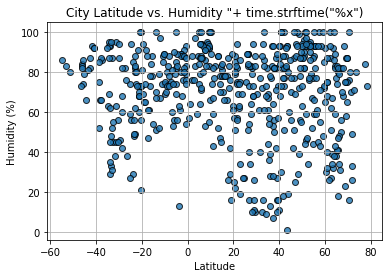

In [41]:
# Build scatter plot for Latitude vs Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Humidity "+ time.strftime("%x")')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Plot Latitude vs Couldiness

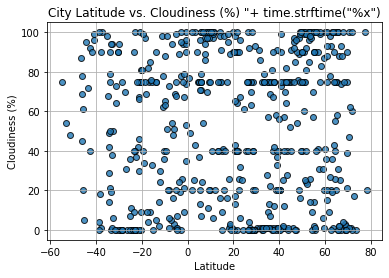

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Cloudiness (%) "+ time.strftime("%x")')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Plot Latitude vs Wind Speed

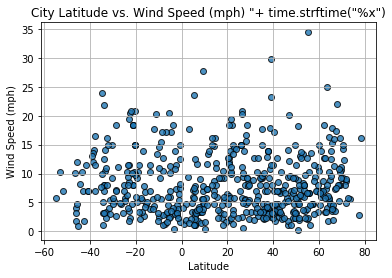

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed (mph) "+ time.strftime("%x")')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [44]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
# Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
# Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
# Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [45]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                      Mataura
Country                        NZ
Date          2020-06-20 03:50:10
Lat                        -46.19
Lng                        168.86
Max Temp                    45.57
Humidity                       84
Cloudiness                     78
Wind Speed                   1.83
Name: 13, dtype: object

In [46]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
539     True
540     True
541     True
542    False
543     True
Name: Lat, Length: 544, dtype: bool

In [47]:
# Cretae Northern and SOuthern Hemisphere data frames
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

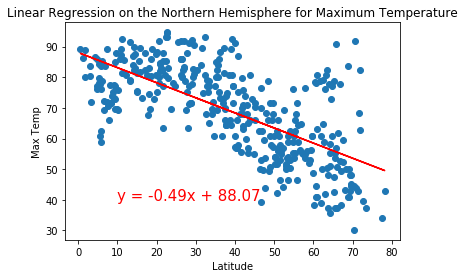

In [48]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))


# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

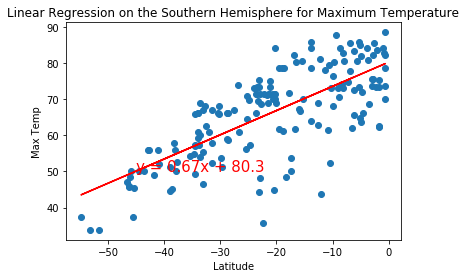

In [49]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-45,50))


# Findings

Revise the accordingly 

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

# Perform Linear Regression on the Percent Humidity for the Northern & Southern Hemisphere

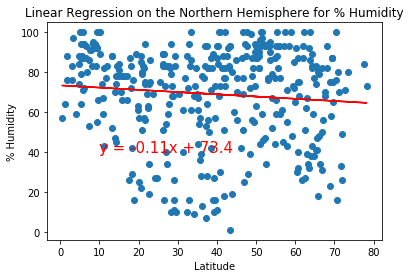

In [50]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Humidity"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (10,40))


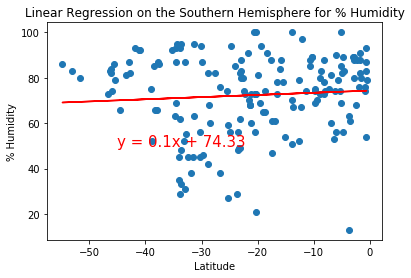

In [51]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Humidity"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-45,50))


# Findings:

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

# Perform Linear Regression on the Percent Cloudiness for the Northern & Southern Hemisphere

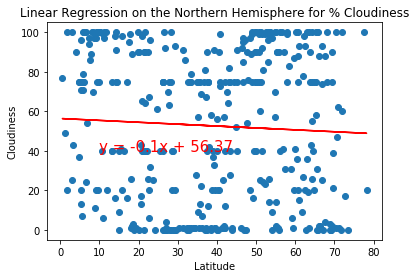

In [52]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Cloudiness', (10,40))


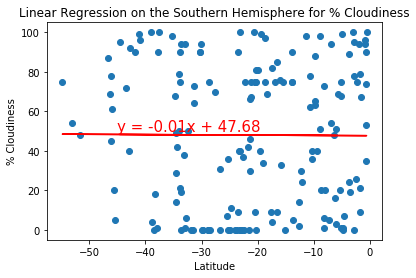

In [53]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-45,50))


# Findings 

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

# Perform Linear Regression on the Wind Speed for the Northern Hemisphere

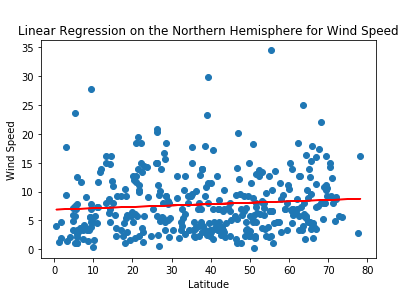

In [54]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed', (10,40))


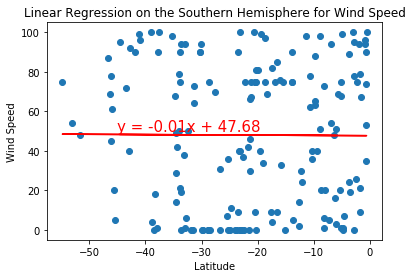

In [55]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed', (-45,50))


# Findings

The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here . This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots.